|Name|SNR|ANR|
|----|---|----|
|Quentin Mowat|2079547|u901929|
|Skirmantas Džežulskis|2060542|865063|

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Skirmantas Dzezulskis"
COLLABORATORS = "Quentin Mowat"

# Research question (0.5 points)

Do vaccination rates against COVID-19 vary between low-, middle-, and high-income countries and appear to be related to improvements in economic activity across countries?

# Motivation (0.5 points)

Motivate why this question is interesting.

The COVID-19 pandemic has been disrupting economies and people's livelihood for more than 2 years now. Spikes in the number of cases has been forcing governments to tighten control measures and shutdown businesses again after initial reopenings due to lower cases. This cycle of reducing and increasing restrictions has an impact on the economic activity. Vaccines against COVID-19 is a solution to reducing transmission rates of the virus, hospitalizations and deaths. Academics believe that vaccines can help in creating immunity rapidly and reduce dramatically the socio-economic costs of the pandemic. In theory, a country with a higher vaccination rate will have fewer cases allowing businesses to stay open and keep running as usual. The cases that do occur are less likely to end in a hospitalization reducing the burden on that country's healthcare system. This encourages governments to push mandates globally and increase the process of vaccination (Gupta & Mano, 2021). Interestingly, the extent to which countries have adopted vaccines varied greatly, leading to different vaccination rates across the globe. This provides an opportunity to explore the relationship between national vaccination rates and economic and financial indicators, such as GDP or national stock indexes.  The analysis on the newly introduced vaccines can shed light on whether there has been an improvement in that country's economic activity and to identify if the vaccines are helping business to return to pre-pandemic operating levels. This is an important research topic in public policy discussions, as the estimated relationships between vaccines and economic indicators could support policy makers to increase national vaccination rates in order to promote economic growth (Gupta & Mano, 2021). This research will add to the growing colection of literature on economic effects of vaccinations against COVID-19. For instance, Hansen and Mano (2021) explore the relationship between vaccinations and economic activity such as consumer spending and unemployment in the US. Using pharmacies per square mile as their instrument, they found that a 1 percentage points increase in initiated vaccinations increases consumer spending by 0.6 percent and reduces unemployment by 0.004 percentage points of the labour force (Hansen & Mano, 2021). 

References:

Hansen, N. H., & Mano, R. C. (2021). COVID-19 Vaccines: A Shot in Arm for the Economy. IMF Working Papers. https://www.imf.org/en/Publications/WP/Issues/2021/12/03/COVID-19-Vaccines-A-Shot-in-Arm-for-the-Economy-510374


Gupta, I., & Baru, R. (2020). Economics & ethics of the COVID-19 vaccine: How prepared are we?. The Indian journal of medical research, 152(1 & 2), 153–155. https://doi.org/10.4103/ijmr.IJMR_3581_20

# Data [0.5 points]

**These 0.5 points are instead of the Method points above**

If you use data for your assignment, the Method part above does not apply. Instead,



Generally, each item is stored in a Pandas Data Frame tabular data format. Rows with missing data are removed for the data cleaning since the sizes of the datasets allows for enough variation with the remaining data. We also make sure that the columns of interest are not indexed in the data frame. Each data frame is stored in a new data frame with smaller number of columns to concentrate only on the variables of interest. To get a quick overview of the dataset, we display the head rows as well as the shape of the data table.

The data used to distinguish low-, middle-, and high-income countries is from the World Bank data which is accessed here using wbdata API. The most important variable used from this dataset is the GNI index per capita, which helps to distinguish different income level countries according to the World Bank methodology.

The dataset used for vaccination rates is from Our World in Data (https://ourworldindata.org/covid-vaccinations). The owid-covid-data.csv file ending on 2022-01-13 is accessed from a GitHub repository. A column is added for vaccinations per capita by dividing number of people fully vaccinated by population for each date and country. Rows with missing values are dropped leaving the dates when vaccinations started for each country. The categorical columns of iso_code, date, and country and the value columns on vaccinations are kept and all other columns are dropped. A categorical column is added to the data frame for low-, middle-, and high-income countries. 

The financial data on different country ETFs (exchange-traded funds) is collected from Yahoo Finance through the Pandas data reader package. A subset of this data only including the close prices of the ETFs is used. All the ETFs are iShares which are managed by the same corporation BlackRock Inc. and are denominated in USD. Countries from each continent are chosen which have an available ETF and allows for variation in country characteristics. The index is reset to have a date column for the comparison plots of ETF prices to vaccinations. 

Data from the Eurostat API is collected for GDP per capita on European countries. We chose the main GDP aggregates per capita dataset which has the code: namq_10_pc. This contains GDP per capita every quarter for European countries. We subset the data by unit choosing current prices euro per capita (CP_EUR_HAB) and by na_item (indicator name) choosing GDP at market prices (B1GQ). Current values from 2019Q1 till present are kept reducing the size of the dataset. The country column is set as the index and the data frame is transposed for each row to correspond to each quarter. A date column is added for each quarter and formatted as datetime.

When analysing the data we primaraly employ visual tools to get an overview, quickly identify patterns, and potential relationships. Box plots with simple summary statistics help to explain the distribution in the interested variables. For futher analysis we use statistical methods of estimating correlation and covariance between the vaccines and economic indicators. Finally, to identify more causal relationships we use regression discontinuity design with ordinary least squares method for the section on the vaccination start date and national stock market perfromance.

# Preview of the answers (0.5 points)

Vaccination rates of high-, middle-, and low-income countries:
* We broadly find a positive relationship between countries income level and COVID-19 vaccination levels from visual charts, as we observe higher average vaccination rates for higher income countries throughout the entire analysed period. For instance, on January 8th average vaccination rate for high income countries was at 64%, for middle income 39% and for low-income countries - 12%. Thus, we do observe that vaccination rates differ accross countries defined by their income level. Moreover, the differences in vaccination rates among such country groups have only increased in recent months. Similarly, we observe higher growth rate in vaccinations for richer nations, especially when compared to poor regions, where the COVID vaccinations per capita have increased just slightly. We also observe that higher income countries started vaccination campaigns considerably earlier than low-income countries. 
* On the other hand, we find that there is high variation within each income level group, with some higher income nations reaching only the same vaccination levels as their poor counterparts.

Relationship between vaccination rates and ETF prices:
* From the graphical comparisons of vaccinations per capita to ETF prices, the USA displays the most obvious positive relationship. Canada’s and India’s relationship between vaccinations and ETF price also appears to be positive from Figure 3 and Figure 2 respectively. We then calculate covariances and correlations for the relationship between vaccinations per capita and ETF prices. The USA stands out as having the highest covariance of 1.33 and a high correlation of 0.90. This could be due to a higher trading volume for an ETF that tracks the S&P 500 rather than other country’s indexes. The next two highest correlations are Switzerland and Canada with 0.87 and 0.74 respectively. A group of countries including Italy, Mexico, UK, and India have correlations of around 0.6. Japan and Singapore’s correlations are close to zero. Several of the countries’ relationship is negative including Brazil, Spain, and Malaysia. China has the greatest negative correlation at 0.75. The average covariance and correlation for the 17 countries is 0.14 and 0.08 respectively. From the sample of these various countries, it is not clear that there is a positive relationship between vaccination rates and each country’s ETF price. After removing the USA outlier for sensitivity analysis, the average covariance and correlation decrease to 0.07 and 0.03 respectively.

Regression discontinuity:
* We find some evidence for a positive relationship between the start of vaccination campaigns and national stock market performance. Though not all countries demonstrate significant causal relationship. Using a regression discontinuity design, we find statistically significant impact of vaccination start on the national stock index ETF for Germany, but not for Australia. However, the impact is not that high reaching around 0.55 USD increase in the ETF value after the introduction of vaccines.

Europe’s vaccination and GDP relationship:
* The relationship between vaccination rates and GDP per capita for the Eurostat countries appears to be positive for every country from the data point for the first quarter of 2021. This is displayed in Figures 4 to 6 as a slight upward trend 3 months after the start of most vaccination programs. Norway has the most obvious positive relationship in the figures. The covariances calculated are positive for all the 21 countries in the sample with an average of 115.72. All the correlations for the relationship between vaccinations and GDP per capita are quite large with an average of 0.89. On closer inspection of the correlation values for Iceland, Malta, Poland, and Serbia are all perfect with a value 1.0. This inflation of the correlation coefficient may occur since there are only two data points in common for these countries after merging the vaccination and GDP data for each over common dates, because the GDP data is only quarterly. After removing the perfect correlations, the average correlation for the 17 remaining countries is 0.86, still significantly large. Bulgaria, Greece, Lithuania, Norway, and Slovenia’s correlation coefficients are close to 1.0. After removing correlations greater than 0.9 the average correlation falls to 0.77 but this leaves only 9 countries remaining in the sample. This is still a significantly large correlation between vaccinations and GDP per capita.

# Main assumptions (0.5 points)

The iShares ETFs used in this analysis track one of each country's stock market index, such as the S&P 500 for the USA. Therefore, we assume that the ETFs are a reasonable financial indicator for each country and their national stock market performance. Because the iShares ETFs are all managed by BlackRock Inc., we assume it is reasonable to make comparisons between them, keeping in mind that there are many factors which affect these different ETFs. 

For the statistical analysis on the relationship between the start of COVID vaccinations and national stock market performance, we use a regression discontinuity design. For this we make several assumptions: 
* The first day of national vaccination campaign indicates the cut-off date and we assume that markets react on this day to this information.
* We assume that no other major news is introduced to financial markets on the same day as the vaccination start date.
* The choice of bandwidth is 20, meaning 20 data points are taken before and after the cut off date.
* There is no precise manipulation at the cut-off date. This is fairly reasonable since the stock index price cannot be easily manipulated with regards to being in the treatment group (after vaccination starting date) and control group (before vaccination starting date).
* Only treatment assignment (with regards to vaccination campaign start) changes at the cut-off and no other characteristics.

# Python code (6.5 points)

In [ ]:
# To fix update problem with pandas datareader, appears to be reocurring in Colabs but works without update in jupyter
!pip install --upgrade pandas_datareader

     |████████████████████████████████| 109 kB 5.3 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [1]:
# Import libraries
import numpy as np
import scipy as sp
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
import wbdata
import seaborn as sns
sns.set_theme()
import eurostat
import statsmodels.formula.api as smf

## Vaccination rates among high/middle/low income groups

In [2]:
# Reading data from World Bank into a dataframe
indicators = {"NY.GDP.PCAP.PP.CD": "gdp_pc", "NY.GNP.PCAP.PP.CD": "gni_pc", "CM.MKT.INDX.ZG": "S&P_global_indices",
             "CM.MKT.LCAP.GD.ZS": "Mkt_cap_domestic_to_gdp", "GFDD.DM.01": "Stock_mkt_cap_to_gdp",
             "NE.EXP.GNFS.ZS": "exports_to_gdp"}
df_world = wbdata.get_dataframe(indicators, 
                          data_date = (dt.datetime(2020, 1, 1), dt.datetime(2021, 1, 1)), convert_date=True)

# Get the top rows of the data frame to understand it
df_world.head()

,gdp_pc,gni_pc,S&P_global_indices,Mkt_cap_domestic_to_gdp,Stock_mkt_cap_to_gdp,exports_to_gdp
country,,,,,,
Afghanistan,2077.874554,2100.000000,NaN,NaN,NaN,NaN
Africa Eastern and Southern,3677.111255,3583.939696,NaN,NaN,NaN,24.888383
Africa Western and Central,4240.534782,4096.053208,NaN,13.011588,NaN,15.619852
Albania,13899.933981,13670.000000,NaN,NaN,NaN,23.111090
Algeria,11320.018820,11090.000000,NaN,NaN,NaN,18.001175


Based on World Bank new thresholds (for GNI per capita in current USD, Atlas method) we can create income categories  for each country:

|Group|GNI_pc|
|----|---|
|low income|0 – 4,095|
|middle income|4,096 -12,695|
|high income|> 12,695|

 (https://blogs.worldbank.org/opendata/new-world-bank-country-classifications-income-level-2021-2022).

In [3]:
# Define new collumn Income Level based on values of GNI per capita
df_world.loc[df_world['gni_pc']<4095, 'income_level'] = 'Low'
df_world.loc[df_world['gni_pc'].between(4095,12695), 'income_level'] = 'Middle'
df_world.loc[df_world['gni_pc']>12695, 'income_level'] = 'High'

# Check data
df_world.head()

,gdp_pc,gni_pc,S&P_global_indices,Mkt_cap_domestic_to_gdp,Stock_mkt_cap_to_gdp,exports_to_gdp,income_level
country,,,,,,,
Afghanistan,2077.874554,2100.000000,NaN,NaN,NaN,NaN,Low
Africa Eastern and Southern,3677.111255,3583.939696,NaN,NaN,NaN,24.888383,Low
Africa Western and Central,4240.534782,4096.053208,NaN,13.011588,NaN,15.619852,Middle
Albania,13899.933981,13670.000000,NaN,NaN,NaN,23.111090,High
Algeria,11320.018820,11090.000000,NaN,NaN,NaN,18.001175,Middle


In [4]:
# Moving index to a column
df_world.reset_index(inplace=True)

# Creating smaller DF with only relevant columns
df_world1 = df_world[['country', 'income_level']]

# Drop rows with no gni_pc value, put it differently: with income_level missing values
df_world1 = df_world1.dropna()
df_world1.head()

,country,income_level
0,Afghanistan,Low
1,Africa Eastern and Southern,Low
2,Africa Western and Central,Middle
3,Albania,High
4,Algeria,Middle


In [5]:
# Checking if the final possible values are as expected
df_world1['income_level'].unique()

array(['Low', 'Middle', 'High'], dtype=object)

In [6]:
# Read data from the csv file
df_vac = pd.read_csv('https://raw.githubusercontent.com/SkirmantasD/AEA1-Final-Assignment/main/owid-covid-data.csv')
df_vac.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.516620e+05,1.515940e+05,1.504430e+05,1.343540e+05,134528.000000,134396.000000,150955.000000,150887.000000,149741.000000,133660.000000,...,98499.000000,97081.000000,63697.000000,114889.000000,144035.000000,126649.000000,5.234000e+03,5234.000000,5234.000000,5234.000000
mean,2.167873e+06,8.873463e+03,8.682692e+03,5.329163e+04,170.272040,169.720537,23865.091299,114.746410,110.607404,462.341098,...,10.584148,32.759481,50.809767,3.026355,73.595278,0.725830,3.479999e+04,9.011418,16.175762,857.853331
std,1.285184e+07,5.709525e+04,5.261424e+04,2.800793e+05,829.926321,810.456091,38979.641504,433.499367,292.572004,728.366899,...,10.498944,13.523369,31.812605,2.452481,7.489167,0.149983,9.949991e+04,16.669961,31.091730,1283.239325
min,1.000000e+00,-7.434700e+04,-6.223000e+03,1.000000e+00,-1918.000000,-232.143000,0.001000,-3125.829000,-272.971000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.195940e+04,-28.450000,-95.920000,-1745.051271
25%,1.606000e+03,1.000000e+00,5.857000e+00,6.900000e+01,0.000000,0.143000,521.805000,0.025000,1.457000,16.035000,...,1.900000,21.600000,19.351000,1.300000,69.500000,0.602000,-9.752500e+01,-0.870000,-0.520000,-37.856745
50%,2.126900e+04,7.100000e+01,9.428600e+01,6.870000e+02,2.000000,2.286000,4060.323000,10.186000,16.206000,107.847000,...,6.300000,31.400000,49.839000,2.400000,75.050000,0.743000,2.580050e+03,5.505000,7.205000,401.789828
75%,2.596222e+05,9.380000e+02,9.902145e+02,6.541750e+03,19.000000,20.143000,31309.424500,88.297000,101.126000,630.972000,...,19.100000,41.300000,83.241000,3.861000,78.930000,0.845000,2.147995e+04,13.887500,22.687500,1456.137413
max,3.200384e+08,3.665667e+06,2.793603e+06,5.520712e+06,18062.000000,14704.857000,373594.126000,51427.491000,9241.954000,6089.945000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.043824e+06,115.000000,374.340000,7912.067517


In [7]:
# Create new column with vaccinations per capita
df_vac['vaccines_pc'] = df_vac['people_fully_vaccinated']/df_vac['population']

# Rename column to country as it will be merged with the World Bank data frame based on country common collumn
df_vac = df_vac.rename(columns={'location': 'country'})

# Subset dataframe with only required columns
df_vac1 = df_vac[['iso_code', 'country', 'date', 'total_vaccinations', 'people_fully_vaccinated', 'population', 'vaccines_pc', 'stringency_index']]
df_vac1.head()

,iso_code,country,date,total_vaccinations,people_fully_vaccinated,population,vaccines_pc,stringency_index
0,AFG,Afghanistan,2020-02-24,NaN,NaN,39835428.0,NaN,8.33
1,AFG,Afghanistan,2020-02-25,NaN,NaN,39835428.0,NaN,8.33
2,AFG,Afghanistan,2020-02-26,NaN,NaN,39835428.0,NaN,8.33
3,AFG,Afghanistan,2020-02-27,NaN,NaN,39835428.0,NaN,8.33
4,AFG,Afghanistan,2020-02-28,NaN,NaN,39835428.0,NaN,8.33


In [8]:
# Drop missing values from DF
df_vac2 = df_vac1.dropna()
df_vac2.head()

,iso_code,country,date,total_vaccinations,people_fully_vaccinated,population,vaccines_pc,stringency_index
442,AFG,Afghanistan,2021-05-11,504502.0,55624.0,39835428.0,0.001396,26.85
451,AFG,Afghanistan,2021-05-20,547901.0,77560.0,39835428.0,0.001947,26.85
455,AFG,Afghanistan,2021-05-24,573277.0,96910.0,39835428.0,0.002433,54.63
457,AFG,Afghanistan,2021-05-26,590454.0,111082.0,39835428.0,0.002789,54.63
458,AFG,Afghanistan,2021-05-27,593313.0,113739.0,39835428.0,0.002855,54.63


In [9]:
# converting date into date type object so that it can be plotted visually in an understanding way
df_vac2['date'] = pd.to_datetime(df_vac2['date'])

<ipython-input-9-5419ced1e03f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac2['date'] = pd.to_datetime(df_vac2['date'])


In [10]:
# Merging DF of World Bank and OWID data frames to use data from both datasets
df_merged = pd.merge(df_vac2, df_world1, on ='country', how ='inner')

# We can now see the new column mapped to the vaccination data frame
df_merged.head()

,iso_code,country,date,total_vaccinations,people_fully_vaccinated,population,vaccines_pc,stringency_index,income_level
0,AFG,Afghanistan,2021-05-11,504502.0,55624.0,39835428.0,0.001396,26.85,Low
1,AFG,Afghanistan,2021-05-20,547901.0,77560.0,39835428.0,0.001947,26.85,Low
2,AFG,Afghanistan,2021-05-24,573277.0,96910.0,39835428.0,0.002433,54.63,Low
3,AFG,Afghanistan,2021-05-26,590454.0,111082.0,39835428.0,0.002789,54.63,Low
4,AFG,Afghanistan,2021-05-27,593313.0,113739.0,39835428.0,0.002855,54.63,Low


In [11]:
# Checking the number of unique countries in the sample
len(df_merged['country'].unique())

147

In [12]:
# Information on the merged data frame
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24146 entries, 0 to 24145
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   iso_code                 24146 non-null  object        
 1   country                  24146 non-null  object        
 2   date                     24146 non-null  datetime64[ns]
 3   total_vaccinations       24146 non-null  float64       
 4   people_fully_vaccinated  24146 non-null  float64       
 5   population               24146 non-null  float64       
 6   vaccines_pc              24146 non-null  float64       
 7   stringency_index         24146 non-null  float64       
 8   income_level             24146 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 1.8+ MB


In [13]:
# Summary statistics
df_merged.describe()

,total_vaccinations,people_fully_vaccinated,population,vaccines_pc,stringency_index
count,2.414600e+04,2.414600e+04,2.414600e+04,2.414600e+04,24146.000000
mean,3.041946e+07,1.186731e+07,5.528155e+07,2.798645e-01,56.130587
std,1.104709e+08,4.316146e+07,1.690754e+08,2.598135e-01,16.090388
min,1.000000e+00,1.000000e+00,6.209200e+04,2.300605e-08,0.000000
25%,1.089480e+06,3.528802e+05,4.982904e+06,3.550989e-02,44.440000
50%,4.760996e+06,1.714602e+06,1.163233e+07,2.016154e-01,56.480000
75%,1.733879e+07,6.679828e+06,4.346682e+07,5.079454e-01,68.060000
max,2.591879e+09,1.162488e+09,1.444216e+09,9.028132e-01,97.220000


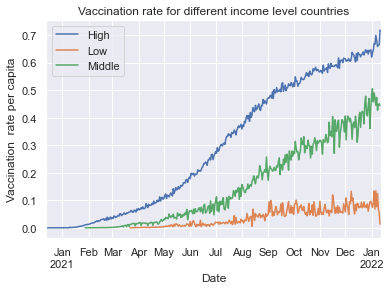

In [14]:
# Using pandas pivot table to group by income level and plot it over time
pd.pivot_table(df_merged.reset_index(),
               index='date', columns='income_level', values='vaccines_pc'
              ).plot(subplots=False)
plt.legend()
plt.title('Vaccination rate for different income level countries')
plt.xlabel("Date")
plt.ylabel("Vaccination  rate per capita");

The chart above displays vaccination rate changes between January 2021 and 2022 for the three different income level groups. It already shows some interesting results. Firstly, as expected we observe a higher vaccination rate for higher income countries throughout the entire analyzed period. Moreover, the gaps between high income and medium income as well as medium and low-income countries have only increased in recent months. Similarly, we observe higher growth rate in vaccinations for richer nations, especially when compared to poor regions, where the COVID vaccines per capita has increased just slightly. Lastly, when looking at the first rises of each line in the graph, we observe that higher income countries started vaccination campaigns considerably earlier than low-income countries.

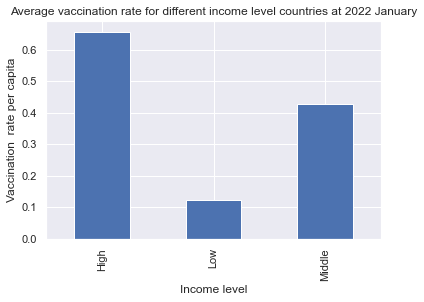

In [15]:
# Filtering the data frame to get vaccination rate on one the the most recent dates, such as 2022 01 08
df_merged_2022Jan = df_merged[df_merged['date']=='2022-01-08']

# Grouping by income level and calculating the average per each income level
vacc_per_income = df_merged_2022Jan.groupby('income_level')['vaccines_pc'].mean()

# Plotting bar plot
vacc_per_income.plot(kind='bar')
plt.title('Average vaccination rate for different income level countries at 2022 January')
plt.xlabel("Income level")
plt.ylabel("Vaccination  rate per capita");

This chart analyses vaccination rate differences at a single point, being one of the latest available dates. Again, we observe noticeable differences between the different income level groups with average vaccination rate for high income countries  at 64%, for middle income - 39% and for low-income countries - 12%.

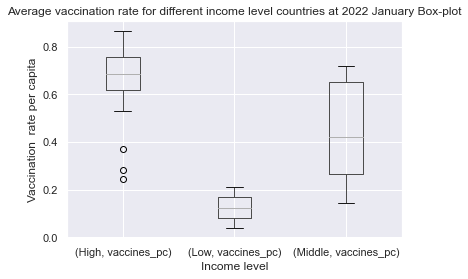

In [16]:
# Repeating the steps to get bloxplot
vacc_per_income2 = df_merged_2022Jan.groupby('income_level')
vacc_per_income2.boxplot(column='vaccines_pc', subplots=False)
plt.title('Average vaccination rate for different income level countries at 2022 January Box-plot')
plt.xlabel("Income level")
plt.ylabel("Vaccination  rate per capita");

The final chart in this part of the analysis demonstrates the spread of vaccination rates within each income level group. Hence, we can observe that there is high variation in the high- and medium-income countries, with some nations reaching only the same vaccination level as their poor counterparts. On the other hand, lower-income countries are clustered closer together with regards to vaccination rates. 

## Yahoo Finance ETF data and vaccination relationship

In [17]:
# Initialize start and end dates for finacial data
end = dt.datetime(2022, 1, 13)
start = dt.datetime(2020, 1, 1)

In [18]:
# List of different country etfs
etfs = ['IVW', 'EWJ', 'FXI', 'EWZ', 'EWT', 'ERUS', 'EWG', 'EWH', 'EWI', 'EWW', 
          'EWU', 'INDA', 'EIDO', 'EWY', 'EWA', 'EWM', 'EWS', 'EWC', 'EWP', 'EWL', 'EZA']

# Import etf data from Yahoo for start and end dates
df_etf = pdr.DataReader(etfs, 'yahoo', start, end)

In [19]:
# Subset etf data for price at close only
df_etf_close = df_etf.Close

# Change ticker symbols to country names 
dict_names = {'IVW':'USA', 'EWJ':'Japan', 'FXI':'China', 'EWZ':'Brazil', 'EWT':'Taiwan', 'ERUS':'Russia', 'EWG':'Germany', 'EWH':'Hong Kong',
              'EWI': 'Italy', 'EWW':'Mexico', 'EWU':'UK', 'INDA':'India', 'EIDO':'Indonesia', 'EWY':'Korea', 'EWA':'Australia',
              'EWM':'Malaysia', 'EWS':'Singapore', 'EWC':'Canada', 'EWP':'Spain', 'EWL':'Switzerland', 'EZA':'South Africa'}
df_etf_close.rename(columns = dict_names, inplace= True)

/Users/quentinmowat-amiet/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [20]:
df_etf_close.head()

Symbols,USA,Japan,China,Brazil,Taiwan,Russia,Germany,Hong Kong,Italy,Mexico,...,India,Indonesia,Korea,Australia,Malaysia,Singapore,Canada,Spain,Switzerland,South Africa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,49.070000,59.860001,44.880001,48.410000,41.660000,43.869999,29.879999,24.920000,29.900000,46.259998,...,35.580002,25.940001,62.169998,22.740000,28.910000,24.450001,29.98,29.299999,40.959999,49.480000
2020-01-03,48.709999,59.200001,43.910000,47.990002,41.060001,42.939999,29.309999,24.580000,29.490000,45.919998,...,34.980000,25.580000,60.910000,22.500000,28.580000,24.110001,29.83,28.870001,40.689999,48.150002
2020-01-06,48.970001,59.410000,44.119999,47.250000,40.790001,43.580002,29.350000,24.650000,29.610001,46.130001,...,34.570000,25.620001,60.689999,22.620001,28.580000,24.090000,29.98,29.010000,40.880001,48.389999
2020-01-07,48.892502,59.509998,44.009998,47.220001,40.599998,43.450001,29.299999,24.639999,29.480000,45.700001,...,34.520000,25.469999,61.340000,22.590000,28.610001,24.200001,30.01,28.639999,40.700001,47.880001
2020-01-08,49.232498,59.520000,43.980000,47.009998,40.610001,44.250000,29.570000,24.680000,29.639999,46.110001,...,34.980000,25.670000,61.380001,22.719999,28.480000,24.350000,29.98,28.700001,40.730000,48.360001


This is subsetting the vaccination data imported in the low, middle, and high income countries part above:

In [21]:
# Subset merged data for etf countries
etf_iso_codes = ['USA', 'JPN', 'CHN', 'BRA', 'TWN', 'RUS', 'DEU', 'HKG', 'ITA', 'MEX', 'GBR', 'IND', 'IDN', 'KOR', 'AUS', 'MYS', 'SGP', 
                 'CAN', 'ESP', 'CHE', 'ZAF']
df_etf_countries = df_merged[df_merged['iso_code'].isin(etf_iso_codes)]

In [22]:
df_etf_countries.head()

,iso_code,country,date,total_vaccinations,people_fully_vaccinated,population,vaccines_pc,stringency_index,income_level
573,AUS,Australia,2021-02-23,6914.0,3.0,25788217.0,1.163322e-07,53.24,High
574,AUS,Australia,2021-02-24,16629.0,3.0,25788217.0,1.163322e-07,53.24,High
575,AUS,Australia,2021-02-25,23510.0,9.0,25788217.0,3.489966e-07,53.24,High
576,AUS,Australia,2021-02-26,30000.0,11.0,25788217.0,4.265514e-07,53.24,High
577,AUS,Australia,2021-02-27,31894.0,12.0,25788217.0,4.653288e-07,50.46,High


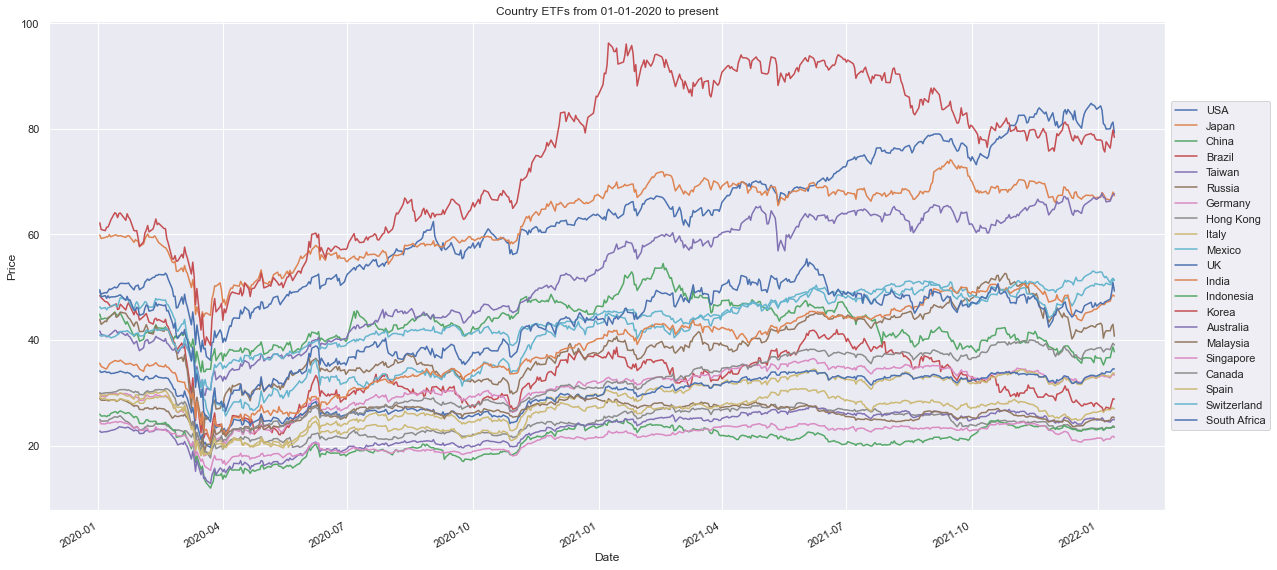

In [23]:
# Overview plot of etf data 
df_etf_close.plot(figsize=(20,10), ylabel = "Price", title = "Country ETFs from 01-01-2020 to present").legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

The above figure is a plot of all the ETFs over a two-year period for a visual overview of the data. There is an obvious drop at 2020-03 signalling the onset of the virus for many countries. Possibly there is slight upward trend at 2021-01 around the start of vaccinations.


In [24]:
# Reset date index to column for etf data
df_etf_close1 = df_etf_close.reset_index()

# Rename date column to Date for etf countries
df_etf_countries.rename(columns = {'date': 'Date'}, inplace = True)

/Users/quentinmowat-amiet/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


The figure below is plotted using matplotlib.pyplot which allows for initializing an object in this case called figure 1. To create subplots an axis object is created with a shape of 2 by 1 for plots that share the x-axis. To plot on each subplot the axis object is called with an index to specify which subplot to plot the data on. The first code line of the pair for each country plots date and vaccinations per capita for a specific country using indexing and subsetting of the entire ETF data frame on the first subplot. The second code line of the pair plots date starting a month before 2021 (the start of most vaccination rollout) and ETF price for the specific country on the second subplot. 

This code is reused below for the remaining figures and in GDP analysis part.

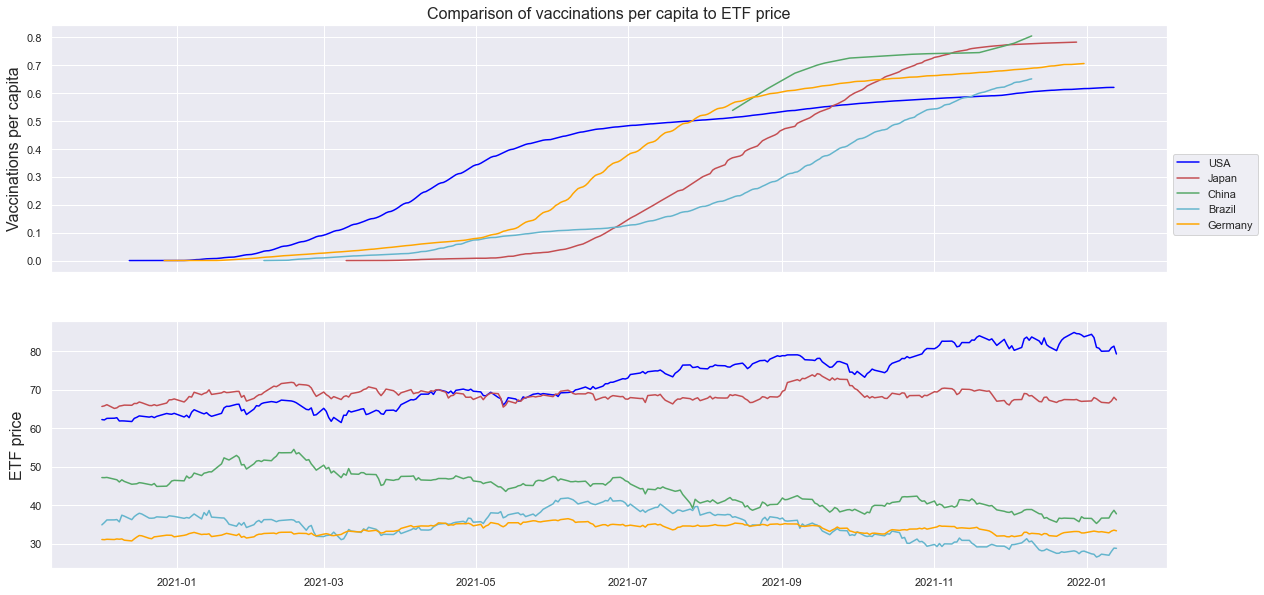

In [25]:
# Figure 1: comparison of vaccination per capita to etf price
fig1, ax = plt.subplots(2, 1, figsize = (20, 10), sharex = True)  # initialize figure and axis object
ax[0].plot(df_etf_countries[df_etf_countries['iso_code'] == 'USA']['Date'], df_etf_countries[df_etf_countries['iso_code'] == 'USA']['vaccines_pc'], 
           label='USA', color='blue')  # plot date and vaccines per capita for USA on first plot
ax[1].plot(df_etf_close1[df_etf_close1['Date'] > '2020-12-01']['Date'], df_etf_close1[df_etf_close1['Date'] > '2020-12-01']['USA'],
           color = 'blue')  # plot date 2020-12-01 till present and etf price for USA on second plot
ax[0].plot(df_etf_countries[df_etf_countries['iso_code'] == 'JPN']['Date'], df_etf_countries[df_etf_countries['iso_code'] == 'JPN']['vaccines_pc'], 
           label='Japan', color='r')  # the next lines of code are repeated for other countries
ax[1].plot(df_etf_close1[df_etf_close1['Date'] > '2020-12-01']['Date'], df_etf_close1[df_etf_close1['Date'] > '2020-12-01']['Japan'],
           color = 'r')
ax[0].plot(df_etf_countries[df_etf_countries['iso_code'] == 'CHN']['Date'], df_etf_countries[df_etf_countries['iso_code'] == 'CHN']['vaccines_pc'], 
           label='China', color='g')
ax[1].plot(df_etf_close1[df_etf_close1['Date'] > '2020-12-01']['Date'], df_etf_close1[df_etf_close1['Date'] > '2020-12-01']['China'],
           color = 'g')
ax[0].plot(df_etf_countries[df_etf_countries['iso_code'] == 'BRA']['Date'], df_etf_countries[df_etf_countries['iso_code'] == 'BRA']['vaccines_pc'], 
           label='Brazil', color='c')
ax[1].plot(df_etf_close1[df_etf_close1['Date'] > '2020-12-01']['Date'], df_etf_close1[df_etf_close1['Date'] > '2020-12-01']['Brazil'],
           color = 'c')
ax[0].plot(df_etf_countries[df_etf_countries['iso_code'] == 'DEU']['Date'], df_etf_countries[df_etf_countries['iso_code'] == 'DEU']['vaccines_pc'], 
           label='Germany', color='orange')
ax[1].plot(df_etf_close1[df_etf_close1['Date'] > '2020-12-01']['Date'], df_etf_close1[df_etf_close1['Date'] > '2020-12-01']['Germany'],
           color = 'orange')
ax[0].set_ylabel("Vaccinations per capita", fontsize=16)
ax[1].set_ylabel("ETF price", fontsize=16)
ax[0].set_title('Comparison of vaccinations per capita to ETF price', fontsize=16)
ax[0].legend(loc="upper left", bbox_to_anchor=(1.0, 0.5));

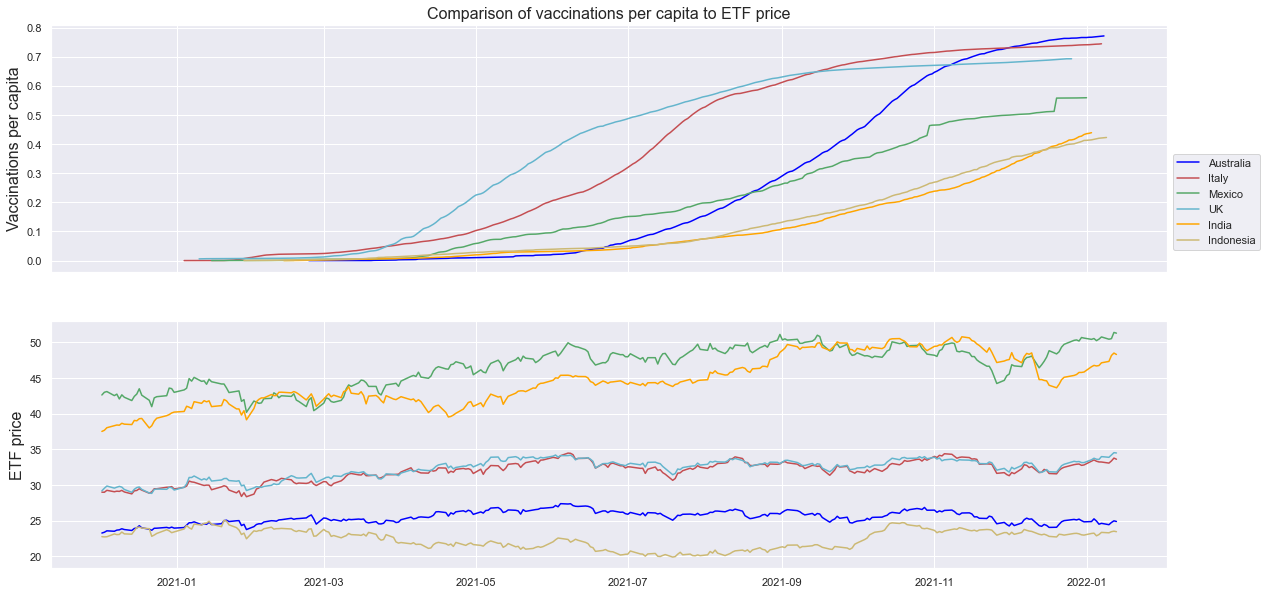

In [26]:
# Figure 2: comparison of vaccination per capita to etf price
fig2, ax = plt.subplots(2, 1, figsize = (20, 10), sharex = True)
ax[0].plot(df_etf_countries[df_etf_countries['iso_code'] == 'AUS']['Date'], df_etf_countries[df_etf_countries['iso_code'] == 'AUS']['vaccines_pc'], 
           label='Australia', color='blue')
ax[1].plot(df_etf_close1[df_etf_close1['Date'] > '2020-12-01']['Date'], df_etf_close1[df_etf_close1['Date'] > '2020-12-01']['Australia'],
           color = 'blue')
ax[0].plot(df_etf_countries[df_etf_countries['iso_code'] == 'ITA']['Date'], df_etf_countries[df_etf_countries['iso_code'] == 'ITA']['vaccines_pc'], 
           label='Italy', color='r')
ax[1].plot(df_etf_close1[df_etf_close1['Date'] > '2020-12-01']['Date'], df_etf_close1[df_etf_close1['Date'] > '2020-12-01']['Italy'],
           color = 'r')
ax[0].plot(df_etf_countries[df_etf_countries['iso_code'] == 'MEX']['Date'], df_etf_countries[df_etf_countries['iso_code'] == 'MEX']['vaccines_pc'], 
           label='Mexico', color='g')
ax[1].plot(df_etf_close1[df_etf_close1['Date'] > '2020-12-01']['Date'], df_etf_close1[df_etf_close1['Date'] > '2020-12-01']['Mexico'],
           color = 'g')
ax[0].plot(df_etf_countries[df_etf_countries['iso_code'] == 'GBR']['Date'], df_etf_countries[df_etf_countries['iso_code'] == 'GBR']['vaccines_pc'], 
           label='UK', color='c')
ax[1].plot(df_etf_close1[df_etf_close1['Date'] > '2020-12-01']['Date'], df_etf_close1[df_etf_close1['Date'] > '2020-12-01']['UK'],
           color = 'c')
ax[0].plot(df_etf_countries[df_etf_countries['iso_code'] == 'IND']['Date'], df_etf_countries[df_etf_countries['iso_code'] == 'IND']['vaccines_pc'], 
           label='India', color='orange')
ax[1].plot(df_etf_close1[df_etf_close1['Date'] > '2020-12-01']['Date'], df_etf_close1[df_etf_close1['Date'] > '2020-12-01']['India'],
           color = 'orange')
ax[0].plot(df_etf_countries[df_etf_countries['iso_code'] == 'IDN']['Date'], df_etf_countries[df_etf_countries['iso_code'] == 'IDN']['vaccines_pc'], 
           label='Indonesia', color='y')
ax[1].plot(df_etf_close1[df_etf_close1['Date'] > '2020-12-01']['Date'], df_etf_close1[df_etf_close1['Date'] > '2020-12-01']['Indonesia'],
           color = 'y')
ax[0].set_ylabel("Vaccinations per capita", fontsize=16)
ax[1].set_ylabel("ETF price", fontsize=16)
ax[0].set_title('Comparison of vaccinations per capita to ETF price', fontsize=16)
ax[0].legend(loc="upper left", bbox_to_anchor=(1.0, 0.5));

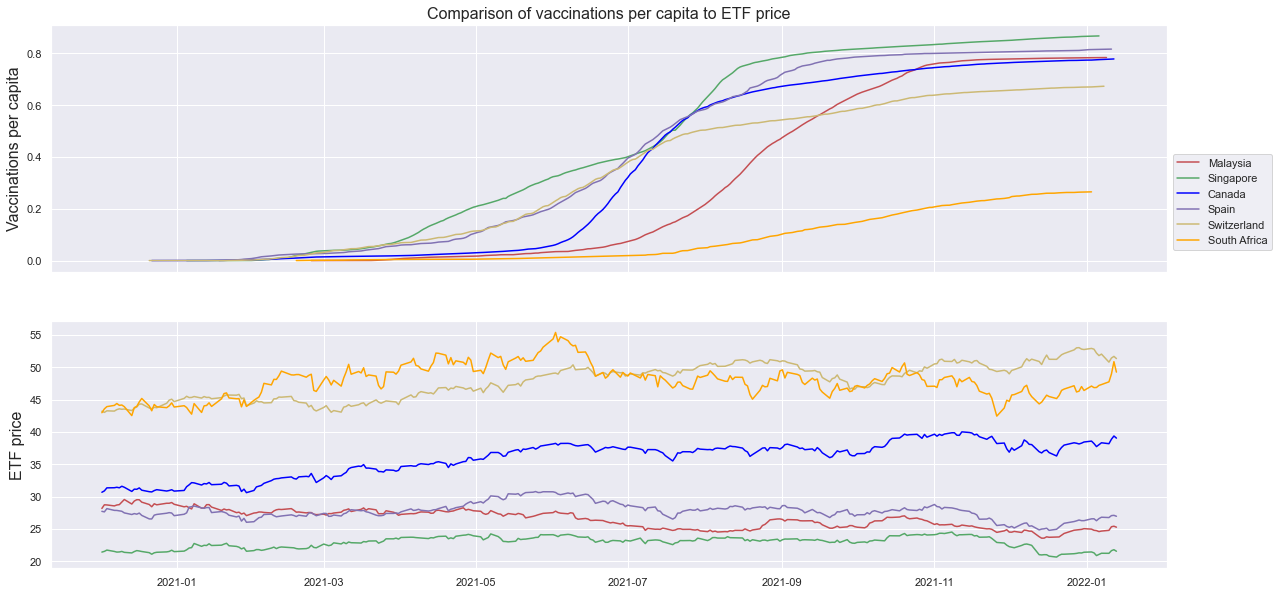

In [27]:
# Figure 3: comparison of vaccination per capita to etf price
fig3, ax = plt.subplots(2, 1, figsize = (20, 10), sharex = True)
ax[0].plot(df_etf_countries[df_etf_countries['iso_code'] == 'MYS']['Date'], df_etf_countries[df_etf_countries['iso_code'] == 'MYS']['vaccines_pc'], 
           label='Malaysia', color='r')
ax[1].plot(df_etf_close1[df_etf_close1['Date'] > '2020-12-01']['Date'], df_etf_close1[df_etf_close1['Date'] > '2020-12-01']['Malaysia'],
           color = 'r')
ax[0].plot(df_etf_countries[df_etf_countries['iso_code'] == 'SGP']['Date'], df_etf_countries[df_etf_countries['iso_code'] == 'SGP']['vaccines_pc'], 
           label='Singapore', color='g')
ax[1].plot(df_etf_close1[df_etf_close1['Date'] > '2020-12-01']['Date'], df_etf_close1[df_etf_close1['Date'] > '2020-12-01']['Singapore'],
           color = 'g')
ax[0].plot(df_etf_countries[df_etf_countries['iso_code'] == 'CAN']['Date'], df_etf_countries[df_etf_countries['iso_code'] == 'CAN']['vaccines_pc'], 
           label='Canada', color='blue')
ax[1].plot(df_etf_close1[df_etf_close1['Date'] > '2020-12-01']['Date'], df_etf_close1[df_etf_close1['Date'] > '2020-12-01']['Canada'],
           color = 'blue')
ax[0].plot(df_etf_countries[df_etf_countries['iso_code'] == 'ESP']['Date'], df_etf_countries[df_etf_countries['iso_code'] == 'ESP']['vaccines_pc'], 
           label='Spain', color='m')
ax[1].plot(df_etf_close1[df_etf_close1['Date'] > '2020-12-01']['Date'], df_etf_close1[df_etf_close1['Date'] > '2020-12-01']['Spain'],
           color = 'm')
ax[0].plot(df_etf_countries[df_etf_countries['iso_code'] == 'CHE']['Date'], df_etf_countries[df_etf_countries['iso_code'] == 'CHE']['vaccines_pc'], 
           label='Switzerland', color='y')
ax[1].plot(df_etf_close1[df_etf_close1['Date'] > '2020-12-01']['Date'], df_etf_close1[df_etf_close1['Date'] > '2020-12-01']['Switzerland'],
           color = 'y')
ax[0].plot(df_etf_countries[df_etf_countries['iso_code'] == 'ZAF']['Date'], df_etf_countries[df_etf_countries['iso_code'] == 'ZAF']['vaccines_pc'], 
           label='South Africa', color='orange')
ax[1].plot(df_etf_close1[df_etf_close1['Date'] > '2020-12-01']['Date'], df_etf_close1[df_etf_close1['Date'] > '2020-12-01']['South Africa'],
           color = 'orange')
ax[0].set_ylabel("Vaccinations per capita", fontsize=16)
ax[1].set_ylabel("ETF price", fontsize=16)
ax[0].set_title('Comparison of vaccinations per capita to ETF price', fontsize=16)
ax[0].legend(loc="upper left", bbox_to_anchor=(1.0, 0.5));

The above 3 figures compare countries' ETF prices to their vaccinations per capita. The plots are split into 3 because it would otherwise be too crowed on one figure, this is done in no specific order. There doesn't appear to be much of an upward trend for the ETF prices as the vaccination rates increase for most of the countries. A few even appear to display a downward trend. 

For each iteration in the loop below, a country's covariance and correlation coefficient are calculated between their vaccination rate and ETF price. First the vaccination data is subset based on the iso code of the country. Second the ETF data is subset keeping the specific country and date column. Third the two data frames are merge on the date column. Then the covariance and correlation are calculated using NumPy. Finally, these values are added to separate lists which are then merged into a data frame with country names to generate summary statistics.


In [28]:
# Lists of iso codes 3-digit for vaccinations, country names for etf prices
iso_3a = ['USA', 'JPN', 'CHN', 'BRA', 'DEU', 'ITA', 'MEX', 'GBR', 'IND', 'IDN', 'AUS', 'MYS', 'SGP', 
                 'CAN', 'ESP', 'CHE', 'ZAF']
etf_list = ['USA', 'Japan', 'China', 'Brazil', 'Germany', 'Italy', 'Mexico', 'UK', 'India', 'Indonesia', 'Australia',
              'Malaysia', 'Singapore', 'Canada', 'Spain', 'Switzerland', 'South Africa']

# Empty lists to be filled with covariance and correlation coefficient
list_cov = []
list_corr = []

# For loop to calculate covaraince and correlation for EU countries
for i, j in zip(iso_3a, etf_list):
  vac = df_etf_countries[df_etf_countries['iso_code'] == i]  # subset vaccination data by iso_code of each country
  etf = df_etf_close1[[j, 'Date']]  # subset ETF data by country and date column
  df = pd.merge(vac, etf, on ='Date', how ='inner')  # merge both subsetted dataframes into one on date column
  cov = np.cov(df['vaccines_pc'], df[j])  # calculate covarince 
  corr = np.corrcoef(df['vaccines_pc'], df[j])  # calculate correlation
  list_cov.append(cov[0, 1])  # append covarince value to list_cov
  list_corr.append(corr[0, 1])  # append corraletion value to list_corr

In [29]:
# Generate dataframe from etf countries' covariance and correlation
df_etf_covrr = pd.DataFrame({'Country': etf_list, 'Covariance': list_cov, 'Correlation': list_corr})
df_etf_covrr

,Country,Covariance,Correlation
0,USA,1.323763,0.901897
1,Japan,0.044992,0.099129
2,China,-0.052529,-0.551382
3,Brazil,-0.433589,-0.599780
4,Germany,0.026271,0.078984
5,Italy,0.218239,0.591118
6,Mexico,0.285137,0.630869
7,UK,0.197273,0.671585
8,India,0.235631,0.621580
9,Indonesia,0.072707,0.432644


In [30]:
# Summary statistics on etf covariance and correlation
df_etf_covrr.describe()

,Covariance,Correlation
count,17.000000,17.000000
mean,0.152203,0.158978
std,0.400927,0.566449
min,-0.433589,-0.646970
25%,-0.073425,-0.350606
50%,0.044992,0.099129
75%,0.235631,0.630869
max,1.323763,0.901897


### Sensitivy Analysis

In [31]:
# Sensitivity analysis remove outlier USA
df_etf_covrr_ad = df_etf_covrr[df_etf_covrr['Correlation'] < 0.9]
df_etf_covrr_ad.describe()

,Covariance,Correlation
count,16.000000,16.000000
mean,0.078981,0.112545
std,0.272464,0.550600
min,-0.433589,-0.646970
25%,-0.080648,-0.400800
50%,0.035632,0.095117
75%,0.222587,0.623902
max,0.604110,0.866326


## Regression Discontinuity for Australia

In [32]:
# converting the data from wide to long in order to have each row contain one value for a country on a given date.
# This is the format in vaccinations data frame, and we intend to merge both datasets
# also moving the index to a column
df_etf_close = df_etf_close.reset_index()
# We here use values from the previously created dictionary for country names
df_etf_close_long = pd.melt(df_etf_close, id_vars='Date', value_vars=list(dict_names.values()))
df_etf_close_long.head()

,Date,Symbols,value
0,2020-01-02,USA,49.070000
1,2020-01-03,USA,48.709999
2,2020-01-06,USA,48.970001
3,2020-01-07,USA,48.892502
4,2020-01-08,USA,49.232498


In [33]:
# rename columns to be comparable with vaccinations data frame
df_etf_close_long = df_etf_close_long.rename(columns={'Date': 'date', 'Symbols': 'country', 'value': 'ETF_value'})
df_etf_close_long.head()

,date,country,ETF_value
0,2020-01-02,USA,49.070000
1,2020-01-03,USA,48.709999
2,2020-01-06,USA,48.970001
3,2020-01-07,USA,48.892502
4,2020-01-08,USA,49.232498


In [34]:
# checking data types of each column before merging
df_etf_close_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10794 entries, 0 to 10793
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       10794 non-null  datetime64[ns]
 1   country    10794 non-null  object        
 2   ETF_value  10794 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 253.1+ KB


In [35]:
# checking data types of each column before merging
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24146 entries, 0 to 24145
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   iso_code                 24146 non-null  object        
 1   country                  24146 non-null  object        
 2   date                     24146 non-null  datetime64[ns]
 3   total_vaccinations       24146 non-null  float64       
 4   people_fully_vaccinated  24146 non-null  float64       
 5   population               24146 non-null  float64       
 6   vaccines_pc              24146 non-null  float64       
 7   stringency_index         24146 non-null  float64       
 8   income_level             24146 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 1.8+ MB


In [36]:
# converting date into date type object to normalize data before merging
df_etf_close_long['date'] = pd.to_datetime(df_etf_close_long['date'])

In [37]:
# merging DF of Yahoo ETFs and OWID based on country and date
df_merged_ETF = pd.merge(df_merged, df_etf_close_long, on =['country', 'date'], how ='right')
# right merge is used to get all dates for the ETF values, since we want to compare stock performance before and after the start of the vaccination
df_merged_ETF.head()

,iso_code,country,date,total_vaccinations,people_fully_vaccinated,population,vaccines_pc,stringency_index,income_level,ETF_value
0,NaN,USA,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,49.070000
1,NaN,USA,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,48.709999
2,NaN,USA,2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,48.970001
3,NaN,USA,2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,48.892502
4,NaN,USA,2020-01-08,NaN,NaN,NaN,NaN,NaN,NaN,49.232498


In [38]:
# check the number of countries included
print('df_merged_ETF: number of countries ' + str(len(df_merged_ETF['country'].unique())))
print('df_etf_close_long: number of countries ' + str(len(df_etf_close_long['country'].unique())))

df_merged_ETF: number of countries 21
df_etf_close_long: number of countries 21


In [39]:
# filter one country for regression discountinity analysis, in this case Australia
AUS_vacEtf = df_merged_ETF[df_merged_ETF['country'] == 'Australia']
# replacing missing values for vaccines per capita to 0
AUS_vacEtf['vaccines_pc'] = AUS_vacEtf['vaccines_pc'].fillna(0)
# reset index when indexing data frame later
AUS_vacEtf = AUS_vacEtf.reset_index()
AUS_vacEtf.head()

<ipython-input-39-204483ea4113>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AUS_vacEtf['vaccines_pc'] = AUS_vacEtf['vaccines_pc'].fillna(0)


,index,iso_code,country,date,total_vaccinations,people_fully_vaccinated,population,vaccines_pc,stringency_index,income_level,ETF_value
0,7196,NaN,Australia,2020-01-02,NaN,NaN,NaN,0.0,NaN,NaN,22.740000
1,7197,NaN,Australia,2020-01-03,NaN,NaN,NaN,0.0,NaN,NaN,22.500000
2,7198,NaN,Australia,2020-01-06,NaN,NaN,NaN,0.0,NaN,NaN,22.620001
3,7199,NaN,Australia,2020-01-07,NaN,NaN,NaN,0.0,NaN,NaN,22.590000
4,7200,NaN,Australia,2020-01-08,NaN,NaN,NaN,0.0,NaN,NaN,22.719999


In [40]:
# storing the date on which vaccination started in the country, so getting the first value at index 
vaccines_start = AUS_vacEtf.loc[AUS_vacEtf['vaccines_pc']>0].date.iloc[0]
print(vaccines_start)

2021-02-23 00:00:00


In [41]:
# checking the row at this starting date
AUS_vacEtf.loc[AUS_vacEtf['date']==vaccines_start]

,index,iso_code,country,date,total_vaccinations,people_fully_vaccinated,population,vaccines_pc,stringency_index,income_level,ETF_value
287,7483,AUS,Australia,2021-02-23,6914.0,3.0,25788217.0,1.163322e-07,53.24,High,25.620001


In [42]:
# find the index of the starting date value. It will later be use to index the data frame
start_index = AUS_vacEtf[AUS_vacEtf['date']==vaccines_start].index.values[0]
print(start_index)

287


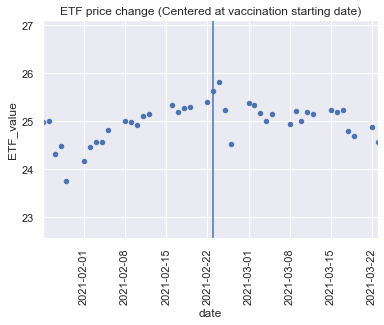

In [43]:
AUS_vacEtf.plot.scatter(x="date", y="ETF_value")
# get 20 data points before and after the cuttof date of starting vaccines, as per our assumption
plt.xlim(AUS_vacEtf.date.iloc[start_index - 20], AUS_vacEtf.date.iloc[start_index + 20])
# y axis limit to minimum and maximum during this period with the plus/minus 5% variation. To zoom in on the data points
plt.ylim(AUS_vacEtf.ETF_value.iloc[start_index-20:start_index+20].min()*0.95, AUS_vacEtf.ETF_value.iloc[start_index-20:start_index+20].max()*1.05)
# plot the cut off date
plt.axvline(AUS_vacEtf.date.iloc[start_index])
# rotate x axis to read dates
plt.xticks(rotation=90)
plt.title("ETF price change (Centered at vaccination starting date)");

Here we plot the running variable (date) on the x-axis and the outcome variable (ETF price) to get a visual representation on the relationship. This also indicates visually if there is any jump around the cut-off date (vaccination starting date) in ETF values.

In [44]:
# Linear regression doesn't work on date data, so we need to convert it into numerical values
AUS_vacEtf['date']=AUS_vacEtf['date'].map(dt.datetime.toordinal)
AUS_vacEtf['date']

0      737426
1      737427
2      737430
3      737431
4      737432
        ...  
509    738162
510    738165
511    738166
512    738167
513    738168
Name: date, Length: 514, dtype: int64

In [45]:
# create new DF just with +-20 days from the cut off for the RD estimates
rd_df = AUS_vacEtf[(AUS_vacEtf['date'] >= AUS_vacEtf.date.iloc[start_index - 20]) & (AUS_vacEtf['date'] <= AUS_vacEtf.date.iloc[start_index + 20])]
rd_df.head()

,index,iso_code,country,date,total_vaccinations,people_fully_vaccinated,population,vaccines_pc,stringency_index,income_level,ETF_value
267,7463,NaN,Australia,737815,NaN,NaN,NaN,0.0,NaN,NaN,24.980000
268,7464,NaN,Australia,737816,NaN,NaN,NaN,0.0,NaN,NaN,25.000000
269,7465,NaN,Australia,737817,NaN,NaN,NaN,0.0,NaN,NaN,24.309999
270,7466,NaN,Australia,737818,NaN,NaN,NaN,0.0,NaN,NaN,24.480000
271,7467,NaN,Australia,737819,NaN,NaN,NaN,0.0,NaN,NaN,23.750000


In [46]:
# RD estimation
# create new column treatment_dummy with values 0 and 1 if the value is after the cut off date. This creates the treatment and control groups.
rd_df = rd_df.assign(treatment_dummy=(rd_df["date"] >= AUS_vacEtf.date.iloc[start_index]).astype(int))
rd_df.head()

,index,iso_code,country,date,total_vaccinations,people_fully_vaccinated,population,vaccines_pc,stringency_index,income_level,ETF_value,treatment_dummy
267,7463,NaN,Australia,737815,NaN,NaN,NaN,0.0,NaN,NaN,24.980000,0
268,7464,NaN,Australia,737816,NaN,NaN,NaN,0.0,NaN,NaN,25.000000,0
269,7465,NaN,Australia,737817,NaN,NaN,NaN,0.0,NaN,NaN,24.309999,0
270,7466,NaN,Australia,737818,NaN,NaN,NaN,0.0,NaN,NaN,24.480000,0
271,7467,NaN,Australia,737819,NaN,NaN,NaN,0.0,NaN,NaN,23.750000,0


In [47]:
# we normalize date values at 0 for the cut off, thus substart the starting date numerical value
rd_df['date_norm'] = rd_df['date'] - AUS_vacEtf.date.iloc[start_index]
rd_df. head()

,index,iso_code,country,date,total_vaccinations,people_fully_vaccinated,population,vaccines_pc,stringency_index,income_level,ETF_value,treatment_dummy,date_norm
267,7463,NaN,Australia,737815,NaN,NaN,NaN,0.0,NaN,NaN,24.980000,0,-29
268,7464,NaN,Australia,737816,NaN,NaN,NaN,0.0,NaN,NaN,25.000000,0,-28
269,7465,NaN,Australia,737817,NaN,NaN,NaN,0.0,NaN,NaN,24.309999,0,-27
270,7466,NaN,Australia,737818,NaN,NaN,NaN,0.0,NaN,NaN,24.480000,0,-26
271,7467,NaN,Australia,737819,NaN,NaN,NaN,0.0,NaN,NaN,23.750000,0,-25


In [48]:
# run the model from the statsmodels package with oridnary least square method
rd_model = smf.ols("ETF_value ~ treatment_dummy + date_norm", rd_df).fit()
# printing the model summary to read results
print(rd_model.summary())

                            OLS Regression Results                            
Dep. Variable:              ETF_value   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     3.191
Date:                Thu, 27 Jan 2022   Prob (F-statistic):             0.0523
Time:                        13:40:48   Log-Likelihood:                -16.922
No. Observations:                  41   AIC:                             39.84
Df Residuals:                      38   BIC:                             44.98
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          24.9535      0.141    1

The results suggests that the national stock index ETF price has increased by 0.05 USD after around 2021-02-23, which is the vaccination start date in Australia. Though the relationship is not statistically significant.


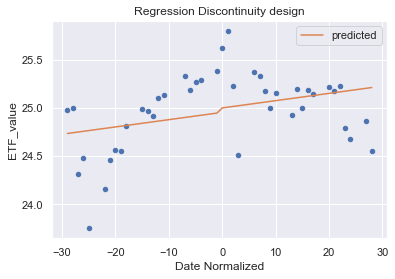

In [49]:
# demonstrate visually estimated RD design
base_plot = rd_df.plot.scatter(x="date_norm", y="ETF_value", color="C0")
rd_df.assign(predicted=rd_model.fittedvalues).plot(x="date_norm", y="predicted", ax=base_plot, color="C1")
plt.xlabel("Date Normalized")
plt.title("Regression Discontinuity design");

Similarly, from the graph we can see visually that there is no significant jump around the cut off date. 

## Eurostat data

In [50]:
# Import main aggregates GDP per capita to dataframe
df_gdppc = eurostat.get_data_df('namq_10_pc')
df_gdppc.head()

,unit,s_adj,na_item,geo\time,2021Q3,2021Q2,2021Q1,2020Q4,2020Q3,2020Q2,...,1982Q2,1982Q1,1981Q4,1981Q3,1981Q2,1981Q1,1980Q4,1980Q3,1980Q2,1980Q1
0,CLV10_EUR_HAB,NSA,B1GQ,AT,9510.0,9140.0,8540.0,9190.0,9040.0,8120.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CLV10_EUR_HAB,NSA,B1GQ,BE,8750.0,9030.0,8570.0,9060.0,8370.0,7880.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CLV10_EUR_HAB,NSA,B1GQ,BG,1840.0,1580.0,1370.0,1780.0,1760.0,1480.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CLV10_EUR_HAB,NSA,B1GQ,CH,15870.0,15680.0,15130.0,15730.0,15350.0,14540.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CLV10_EUR_HAB,NSA,B1GQ,CY,6370.0,6220.0,5820.0,6120.0,6090.0,5550.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# Subset data to first quarter of 2019 to present
df_gdppc1 = df_gdppc.loc[:, "unit":"2019Q1"]

In [52]:
# Subset data by unit and na_item desired
df_gdppc2 = df_gdppc1[(df_gdppc1['unit'] == "CP_EUR_HAB") &  #  CP_EUR_HAB: Current prices, euro per capita
             (df_gdppc1['na_item'] == "B1GQ")] #  B1GQ: Gross domestic product at market prices


In [53]:
# Manipulate dataframe for ease of use 
df_gdppc3 = df_gdppc2.dropna()  # drop rows with missing values
df_gdppc3.set_index("geo\\time", inplace=True)  # set index as country column
df_gdppc4 = df_gdppc3.loc[:, '2021Q3': '2019Q1']  # keep only date columns
df_gdppc5 = df_gdppc4.T  # transpose dataframe, dates as rows, countries as columns
df_gdppc_eur = df_gdppc5.sort_index(ascending=True)  # sort by ascending dates


In [54]:
# Add date column to eurostat gdo data for merging and analysis
dates_qs = ['2019-03-30', '2019-06-30', '2019-09-30', '2019-12-31', '2020-03-30', '2020-06-30', '2020-09-30', '2020-12-31',
            '2021-03-30', '2021-06-30', '2021-09-30']
df_gdppc_eur['date'] = dates_qs
df_gdppc_eur['date'] = pd.to_datetime(df_gdppc_eur['date'])  # convert new date column to datetime 

In [55]:
# Display final dataframe
df_gdppc_eur

geo\time,AT,BE,BG,CH,CY,CZ,DE,DK,EA,EA12,...,NL,NO,PL,PT,RO,RS,SE,SI,SK,date
2019Q1,10850.0,10010.0,1850.0,18360.0,6160.0,4870.0,10270.0,12870.0,8490.0,8680.0,...,11420.0,17360.0,3190.0,4960.0,2200.0,1470.0,11390.0,5380.0,3980.0,2019-03-30
2019Q2,11120.0,10470.0,2180.0,18840.0,6650.0,5300.0,10260.0,13480.0,8720.0,8900.0,...,11970.0,16820.0,3380.0,5220.0,2680.0,1630.0,11890.0,5820.0,4330.0,2019-06-30
2019Q3,11140.0,10100.0,2340.0,19300.0,6750.0,5400.0,10550.0,13280.0,8730.0,8900.0,...,11510.0,16150.0,3440.0,5290.0,3160.0,1720.0,11050.0,5980.0,4500.0,2019-09-30
2019Q4,11670.0,11040.0,2440.0,19710.0,6540.0,5570.0,10720.0,13750.0,9060.0,9250.0,...,11990.0,17320.0,3890.0,5360.0,3460.0,1810.0,12030.0,5980.0,4440.0,2019-12-31
2020Q1,10620.0,10010.0,1900.0,19180.0,6150.0,5000.0,10340.0,13250.0,8370.0,8550.0,...,11590.0,15840.0,3370.0,4920.0,2350.0,1610.0,11260.0,5410.0,3970.0,2020-03-30
2020Q2,9890.0,9080.0,2040.0,18390.0,5610.0,4660.0,9310.0,12920.0,7620.0,7770.0,...,11000.0,13340.0,3070.0,4430.0,2410.0,1580.0,11040.0,5240.0,3940.0,2020-06-30
2020Q3,10840.0,9800.0,2410.0,19170.0,6280.0,5150.0,10260.0,13450.0,8450.0,8610.0,...,11390.0,14330.0,3430.0,5000.0,3050.0,1740.0,11160.0,5840.0,4500.0,2020-09-30
2020Q4,11180.0,10690.0,2500.0,19580.0,6110.0,5310.0,10580.0,13980.0,8810.0,8990.0,...,11900.0,15670.0,3780.0,5080.0,3490.0,1850.0,12450.0,5820.0,4450.0,2020-12-31
2021Q1,10240.0,10230.0,2000.0,18760.0,5990.0,4970.0,10190.0,13320.0,8400.0,8580.0,...,11510.0,16690.0,3380.0,4710.0,2400.0,1690.0,11970.0,5540.0,4000.0,2021-03-30
2021Q2,11210.0,10870.0,2310.0,19460.0,6420.0,5600.0,10380.0,14320.0,8780.0,8950.0,...,12390.0,17520.0,3570.0,5130.0,2870.0,1900.0,12920.0,6190.0,4420.0,2021-06-30


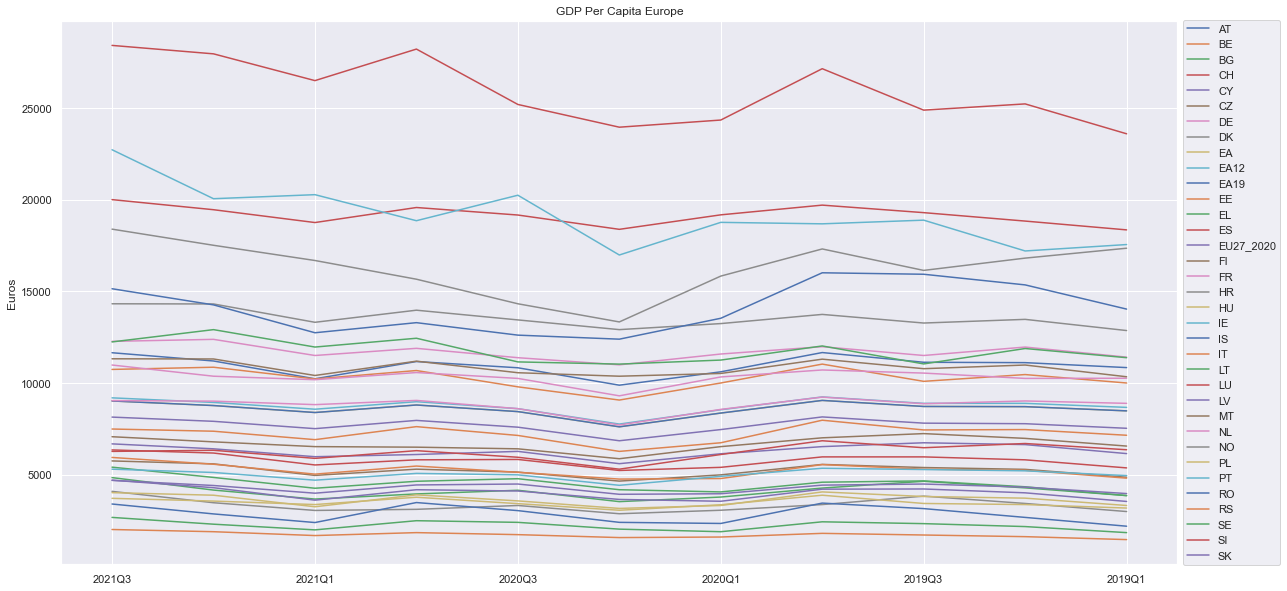

In [56]:
# Overview plot of gdp data for Europe by country
df_gdppc5.plot(figsize=(20,10), ylabel = "Euros", title = "GDP Per Capita Europe").legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

The above figure plots all the Eurostat countries' quarterly GDP per capita over a two-year period. It does appear that there is a slight upward trend from the beginning of 2021 onwards for most countries.
 

## Europe vaccination and GDP relationship

The same code from the ETF figures is used again to plot the comparison of vaccination rate to GDP per capita for Eurostat countries. The only difference is the GDP per capita data frame is called and dates start at 2020-09-01 to include the data point for the final quarter of 2020.

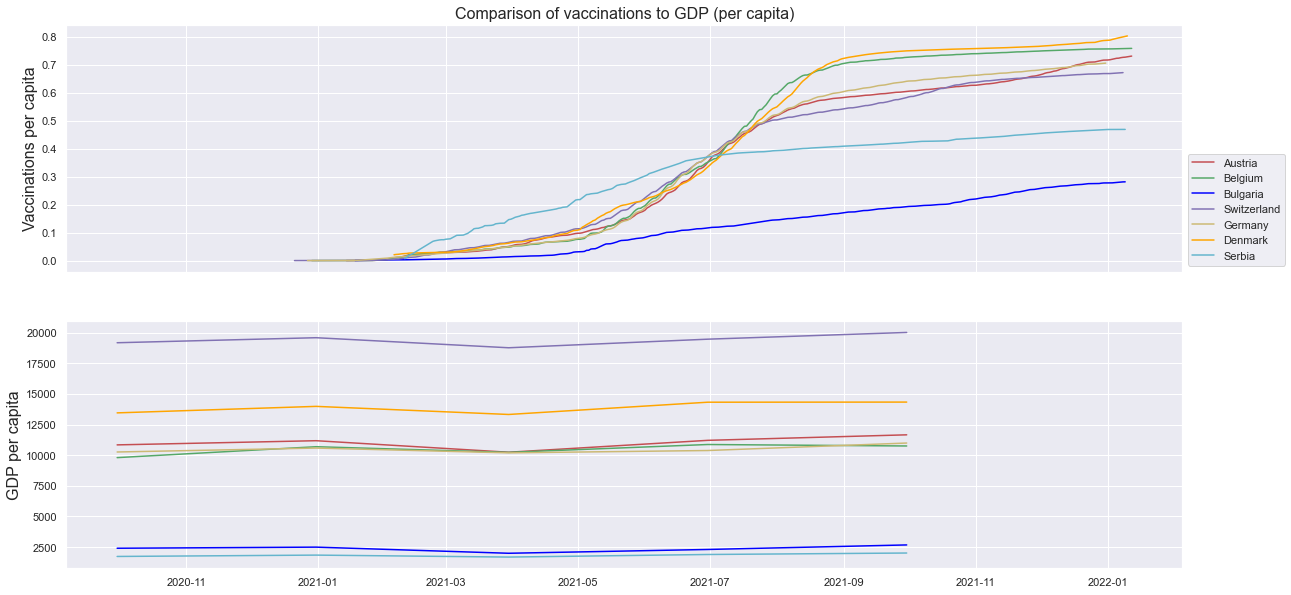

In [57]:
# Figure 4: comparison of vaccinations to GDP (per capita)
fig4, ax = plt.subplots(2, 1, figsize = (20, 10), sharex = True)
ax[0].plot(df_merged[df_merged['iso_code'] == 'AUT']['date'], df_merged[df_merged['iso_code'] == 'AUT']['vaccines_pc'], 
           label='Austria', color='r')  # plot date and vaccines per capita for Austria on first plot
ax[1].plot(df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['date'], df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['AT'],
           color = 'r')  # plot date 2020-09-01 and on and GDP per capita for Austria on second plot
ax[0].plot(df_merged[df_merged['iso_code'] == 'BEL']['date'], df_merged[df_merged['iso_code'] == 'BEL']['vaccines_pc'], 
           label='Belgium', color='g')  # previous code is repated to add other countries to figure
ax[1].plot(df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['date'], df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['BE'],
           color = 'g')
ax[0].plot(df_merged[df_merged['iso_code'] == 'BGR']['date'], df_merged[df_merged['iso_code'] == 'BGR']['vaccines_pc'], 
           label='Bulgaria', color='blue')
ax[1].plot(df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['date'], df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['BG'],
           color = 'blue')
ax[0].plot(df_merged[df_merged['iso_code'] == 'CHE']['date'], df_merged[df_merged['iso_code'] == 'CHE']['vaccines_pc'], 
           label='Switzerland', color='m')
ax[1].plot(df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['date'], df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['CH'],
           color = 'm')
ax[0].plot(df_merged[df_merged['iso_code'] == 'DEU']['date'], df_merged[df_merged['iso_code'] == 'DEU']['vaccines_pc'], 
           label='Germany', color='y')
ax[1].plot(df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['date'], df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['DE'],
           color = 'y')
ax[0].plot(df_merged[df_merged['iso_code'] == 'DNK']['date'], df_merged[df_merged['iso_code'] == 'DNK']['vaccines_pc'], 
           label='Denmark', color='orange')
ax[1].plot(df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['date'], df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['DK'],
           color = 'orange')
ax[0].plot(df_merged[df_merged['iso_code'] == 'SRB']['date'], df_merged[df_merged['iso_code'] == 'SRB']['vaccines_pc'], 
           label='Serbia', color='c')
ax[1].plot(df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['date'], df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['RS'],
           color = 'c')
ax[0].set_ylabel("Vaccinations per capita", fontsize=16)
ax[1].set_ylabel("GDP per capita", fontsize=16)
ax[0].set_title('Comparison of vaccinations to GDP (per capita)', fontsize=16)
ax[0].legend(loc="upper left", bbox_to_anchor=(1.0, 0.5));

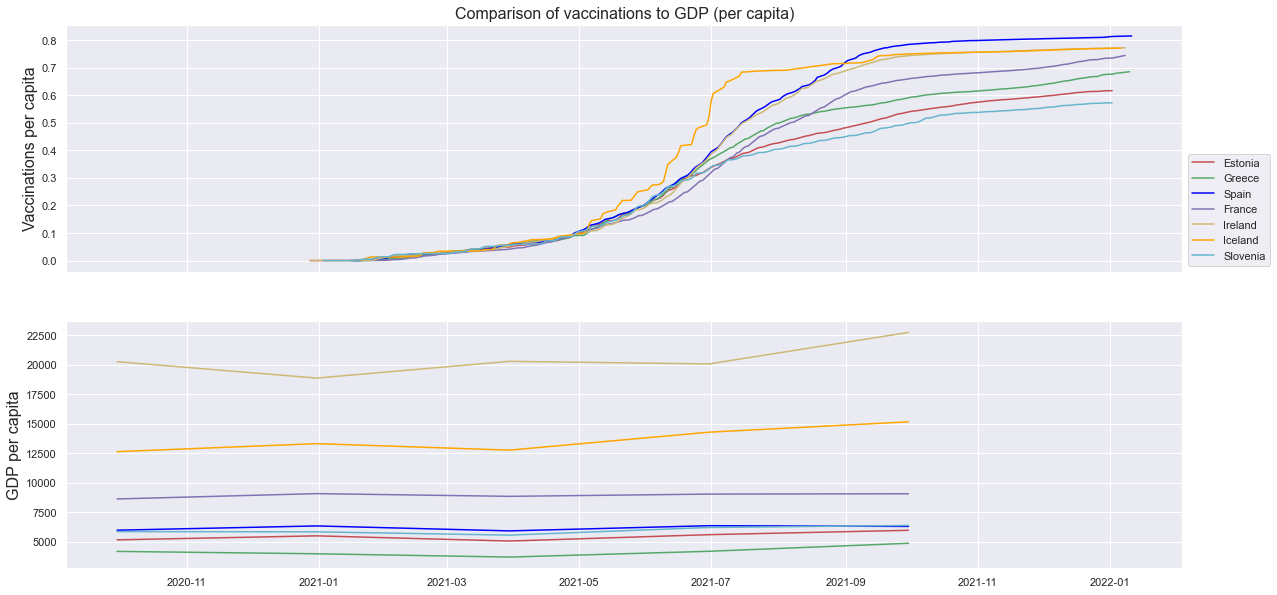

In [58]:
# Figure 5: comparison of vaccinations to GDP (per capita)
fig4, ax = plt.subplots(2, 1, figsize = (20, 10), sharex = True)
ax[0].plot(df_merged[df_merged['iso_code'] == 'EST']['date'], df_merged[df_merged['iso_code'] == 'EST']['vaccines_pc'], 
           label='Estonia', color='r')
ax[1].plot(df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['date'], df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['EE'],
           color = 'r')
ax[0].plot(df_merged[df_merged['iso_code'] == 'GRC']['date'], df_merged[df_merged['iso_code'] == 'GRC']['vaccines_pc'], 
           label='Greece', color='g')
ax[1].plot(df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['date'], df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['EL'],
           color = 'g')
ax[0].plot(df_merged[df_merged['iso_code'] == 'ESP']['date'], df_merged[df_merged['iso_code'] == 'ESP']['vaccines_pc'], 
           label='Spain', color='blue')
ax[1].plot(df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['date'], df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['ES'],
           color = 'blue')
ax[0].plot(df_merged[df_merged['iso_code'] == 'FRA']['date'], df_merged[df_merged['iso_code'] == 'FRA']['vaccines_pc'], 
           label='France', color='m')
ax[1].plot(df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['date'], df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['FR'],
           color = 'm')
ax[0].plot(df_merged[df_merged['iso_code'] == 'IRL']['date'], df_merged[df_merged['iso_code'] == 'IRL']['vaccines_pc'], 
           label='Ireland', color='y')
ax[1].plot(df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['date'], df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['IE'],
           color = 'y')
ax[0].plot(df_merged[df_merged['iso_code'] == 'ISL']['date'], df_merged[df_merged['iso_code'] == 'ISL']['vaccines_pc'], 
           label='Iceland', color='orange')
ax[1].plot(df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['date'], df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['IS'],
           color = 'orange')
ax[0].plot(df_merged[df_merged['iso_code'] == 'SVN']['date'], df_merged[df_merged['iso_code'] == 'SVN']['vaccines_pc'], 
           label='Slovenia', color='c')
ax[1].plot(df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['date'], df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['SI'],
           color = 'c')
ax[0].set_ylabel("Vaccinations per capita", fontsize=16)
ax[1].set_ylabel("GDP per capita", fontsize=16)
ax[0].set_title('Comparison of vaccinations to GDP (per capita)', fontsize=16)
ax[0].legend(loc="upper left", bbox_to_anchor=(1.0, 0.5));

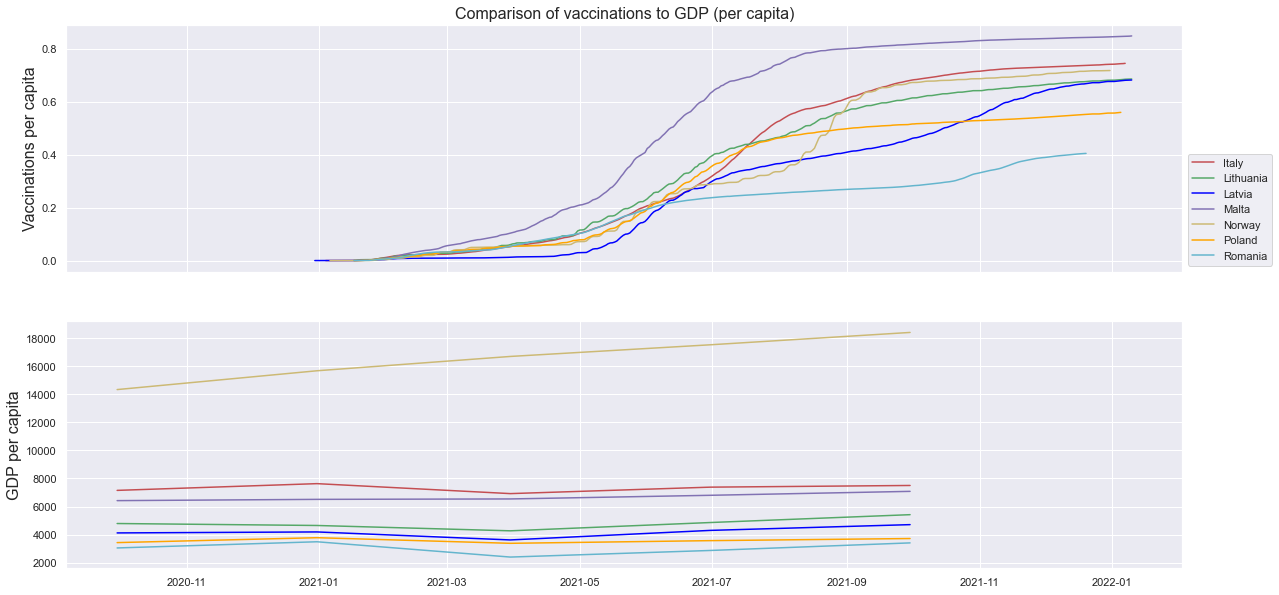

In [59]:
# Figure 6: comparison of vaccinations to GDP (per capita)
fig6, ax = plt.subplots(2, 1, figsize = (20, 10), sharex = True)
ax[0].plot(df_merged[df_merged['iso_code'] == 'ITA']['date'], df_merged[df_merged['iso_code'] == 'ITA']['vaccines_pc'], 
           label='Italy', color='r')
ax[1].plot(df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['date'], df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['IT'],
           color = 'r')
ax[0].plot(df_merged[df_merged['iso_code'] == 'LTU']['date'], df_merged[df_merged['iso_code'] == 'LTU']['vaccines_pc'], 
           label='Lithuania', color='g')
ax[1].plot(df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['date'], df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['LT'],
           color = 'g')
ax[0].plot(df_merged[df_merged['iso_code'] == 'LVA']['date'], df_merged[df_merged['iso_code'] == 'LVA']['vaccines_pc'], 
           label='Latvia', color='blue')
ax[1].plot(df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['date'], df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['LV'],
           color = 'blue')
ax[0].plot(df_merged[df_merged['iso_code'] == 'MLT']['date'], df_merged[df_merged['iso_code'] == 'MLT']['vaccines_pc'], 
           label='Malta', color='m')
ax[1].plot(df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['date'], df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['MT'],
           color = 'm')
ax[0].plot(df_merged[df_merged['iso_code'] == 'NOR']['date'], df_merged[df_merged['iso_code'] == 'NOR']['vaccines_pc'], 
           label='Norway', color='y')
ax[1].plot(df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['date'], df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['NO'],
           color = 'y')
ax[0].plot(df_merged[df_merged['iso_code'] == 'POL']['date'], df_merged[df_merged['iso_code'] == 'POL']['vaccines_pc'], 
           label='Poland', color='orange')
ax[1].plot(df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['date'], df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['PL'],
           color = 'orange')
ax[0].plot(df_merged[df_merged['iso_code'] == 'ROU']['date'], df_merged[df_merged['iso_code'] == 'ROU']['vaccines_pc'], 
           label='Romania', color='c')
ax[1].plot(df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['date'], df_gdppc_eur[df_gdppc_eur['date'] > '2020-09-01']['RO'],
           color = 'c')
ax[0].set_ylabel("Vaccinations per capita", fontsize=16)
ax[1].set_ylabel("GDP per capita", fontsize=16)
ax[0].set_title('Comparison of vaccinations to GDP (per capita)', fontsize=16)
ax[0].legend(loc="upper left", bbox_to_anchor=(1.0, 0.5));

The above 3 figures display Eurostat countries’ vaccination rate to GDP per capita from the start of vaccinations onwards. Again, the countries' data is plotted on 3 separate graphs to avoid an overcrowded figure, this is done in no particular order. A couple of the countries display a visible upward trend of GDP per capita as the vaccination rate increases, such as Norway. The rest show a slight upward trend as the vaccination rate increases.

In [60]:
# Lists of iso codes 3-digit for vaccinations, 2-digit for GDP
iso_3b = ['AUT', 'BEL', 'BGR', 'CHE', 'DEU', 'DNK', 'EST', 'GRC', 'ESP', 'FRA', 
         'IRL', 'ISL', 'ITA', 'LTU', 'LVA', 'MLT', 'NOR', 
         'POL', 'ROU', 'SRB', 'SVN']

iso_2 = ['AT', 'BE', 'BG', 'CH', 'DE', 'DK', 'EE', 'EL', 'ES', 'FR', 
         'IE', 'IS', 'IT', 'LT', 'LV', 'MT', 'NO', 'PL', 
         'RO', 'RS', 'SI']

# Empty lists to be filled with covariance and correlation coefficient
list_cov1 = []
list_corr1 = []

# For loop to calculate covaraince and correlation for EU countries
for i, j in zip(iso_3b, iso_2):
  vac = df_merged[df_merged['iso_code'] == i]
  gdp = df_gdppc_eur[[j, 'date']]
  df = pd.merge(vac, gdp, on ='date', how ='inner')
  cov = np.cov(df['vaccines_pc'], df[j])
  corr = np.corrcoef(df['vaccines_pc'], df[j])
  list_cov1.append(cov[0, 1])
  list_corr1.append(corr[0, 1])

In [61]:
# List of eurostat country names used for covariance and correlation analysis
eugdp_list = ['Austria', 'Belgium', 'Bulgaria', 'Switzerland', 'Germany', 'Denmark', 'Estonia', 'Greece', 'Spain', 'France', 
         'Ireland', 'Iceland', 'Italy', 'Lithuania', 'Latvia', 'Malta', 'Norway', 
         'Poland', 'Romania', 'Serbia', 'Slovenia']

In [62]:
# Generate dataframe from gdp countries' covariance and correlation
df_gdp_covrr1 = pd.DataFrame({'Country': eugdp_list, 'Covariance': list_cov1, 'Correlation': list_corr1})
df_gdp_covrr1

,Country,Covariance,Correlation
0,Austria,198.767329,0.987119
1,Belgium,48.944516,0.521109
2,Bulgaria,30.358446,0.990458
3,Switzerland,94.257380,0.667418
4,Germany,72.359162,0.704564
5,Denmark,161.819885,0.805047
6,Estonia,78.406328,0.827958
7,Greece,154.823000,0.983219
8,Spain,66.176493,0.760890
9,France,32.975949,0.892375


In [63]:
# Summary statistics on gdp covariance and correlation
df_gdp_covrr1.describe()

,Covariance,Correlation
count,21.000000,21.000000
mean,115.710097,0.889742
std,106.832017,0.134130
min,28.337429,0.521109
25%,56.541626,0.827958
50%,84.015011,0.929342
75%,154.823000,0.992702
max,500.591546,1.000000


### Sensitivity Analysis

In [64]:
# Sensitivity analysis remove perfect correltions
df_gdp_covrr1_ad = df_gdp_covrr1[df_gdp_covrr1['Correlation'] < 0.995]
df_gdp_covrr1_ad.describe()

,Covariance,Correlation
count,17.000000,17.000000
mean,128.637540,0.863799
std,114.677080,0.136873
min,30.358446,0.521109
25%,66.176493,0.805047
50%,88.021723,0.898118
75%,158.954998,0.983219
max,500.591546,0.994967


In [65]:
# Sensitivity analysis remove potential inflated correlations
df_gdp_covrr1_ad = df_gdp_covrr1[df_gdp_covrr1['Correlation'] < 0.9]
df_gdp_covrr1_ad.describe()

,Covariance,Correlation
count,9.000000,9.000000
mean,126.616252,0.767960
std,144.776196,0.120877
min,32.975949,0.521109
25%,66.176493,0.704564
50%,78.406328,0.805047
75%,94.257380,0.834161
max,500.591546,0.898118


# Sensitivity analysis (0.5 points)

* At the end of both the ETF and GDP analysis parts presented above outliers and inflated values are removed for sensitivy analysis of the average correlation coefficient. 
* Here we are going to check how sensitive our regression discontinuity results are when analysing a different country. Let us check if we find statistical significance between Germany’s vaccination start date and national stock index ETF value. The script includes the same code except this time we analyse German data rather than Australian.

In [66]:
# filter another country for regression discountinity analysis, in this case Germany
GER_vacEtf = df_merged_ETF[df_merged_ETF['country'] == 'Germany']
# replacing missing values for vaccines per capita to 0
GER_vacEtf['vaccines_pc'] = GER_vacEtf['vaccines_pc'].fillna(0)
# reset index when indexing data frame later
GER_vacEtf = GER_vacEtf.reset_index()
GER_vacEtf

<ipython-input-66-5cdbe3d18cac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GER_vacEtf['vaccines_pc'] = GER_vacEtf['vaccines_pc'].fillna(0)


,index,iso_code,country,date,total_vaccinations,people_fully_vaccinated,population,vaccines_pc,stringency_index,income_level,ETF_value
0,3084,NaN,Germany,2020-01-02,NaN,NaN,NaN,0.0,NaN,NaN,29.879999
1,3085,NaN,Germany,2020-01-03,NaN,NaN,NaN,0.0,NaN,NaN,29.309999
2,3086,NaN,Germany,2020-01-06,NaN,NaN,NaN,0.0,NaN,NaN,29.350000
3,3087,NaN,Germany,2020-01-07,NaN,NaN,NaN,0.0,NaN,NaN,29.299999
4,3088,NaN,Germany,2020-01-08,NaN,NaN,NaN,0.0,NaN,NaN,29.570000
...,...,...,...,...,...,...,...,...,...,...,...
509,3593,NaN,Germany,2022-01-07,NaN,NaN,NaN,0.0,NaN,NaN,33.110001
510,3594,NaN,Germany,2022-01-10,NaN,NaN,NaN,0.0,NaN,NaN,32.810001
511,3595,NaN,Germany,2022-01-11,NaN,NaN,NaN,0.0,NaN,NaN,33.259998
512,3596,NaN,Germany,2022-01-12,NaN,NaN,NaN,0.0,NaN,NaN,33.509998


In [67]:
# storing the date on which vaccination started in the country, so getting the first value at index 
vaccines_start = GER_vacEtf.loc[GER_vacEtf['vaccines_pc']>0].date.iloc[0]
print(vaccines_start)

2020-12-28 00:00:00


In [68]:
# checking the row at this start date
GER_vacEtf.loc[GER_vacEtf['date']==vaccines_start]

,index,iso_code,country,date,total_vaccinations,people_fully_vaccinated,population,vaccines_pc,stringency_index,income_level,ETF_value
249,3333,DEU,Germany,2020-12-28,42456.0,75.0,83900471.0,8.939163e-07,82.41,High,32.200001


In [69]:
# find index of the starting date value
start_index = GER_vacEtf[GER_vacEtf['date']==vaccines_start].index.values[0]
print(start_index)

249


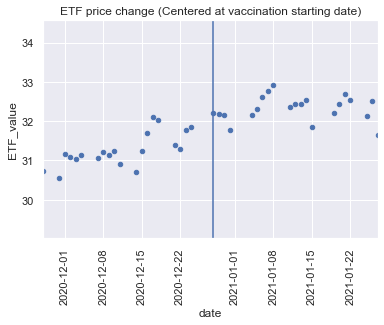

In [70]:
GER_vacEtf.plot.scatter(x="date", y="ETF_value")
# get 20 data points before and after the cuttof date of starting vaccines
plt.xlim(GER_vacEtf.date.iloc[start_index - 20], GER_vacEtf.date.iloc[start_index + 20])
# y axis limit to minimum and maximum during this period +- 5%
plt.ylim(GER_vacEtf.ETF_value.iloc[start_index-20:start_index+20].min()*0.95, GER_vacEtf.ETF_value.iloc[start_index-20:start_index+20].max()*1.05)
# plot the cut off date
plt.axvline(GER_vacEtf.date.iloc[start_index])
# rotate x axis to read dates
plt.xticks(rotation=90)
plt.title("ETF price change (Centered at vaccination starting date)");

Here we plot the runing variable (date) on the x-axis and the outcome variable (ETF price) to get a visual representation on the relationship. This also indicates visually if there is any jump around the cut-off date (vaccination starting date) in ETF values. 

In [71]:
#Linear regression doesn't work on date data, so we need to convert it into numerical values
GER_vacEtf['date']=GER_vacEtf['date'].map(dt.datetime.toordinal)
GER_vacEtf['date']

0      737426
1      737427
2      737430
3      737431
4      737432
        ...  
509    738162
510    738165
511    738166
512    738167
513    738168
Name: date, Length: 514, dtype: int64

In [72]:
# create new DF just with +-20 days from the cut off for the RD estimates
rd_df = GER_vacEtf[(GER_vacEtf['date'] >= GER_vacEtf.date.iloc[start_index - 20]) & (GER_vacEtf['date'] <= GER_vacEtf.date.iloc[start_index + 20])]
rd_df.head()

,index,iso_code,country,date,total_vaccinations,people_fully_vaccinated,population,vaccines_pc,stringency_index,income_level,ETF_value
229,3313,NaN,Germany,737756,NaN,NaN,NaN,0.0,NaN,NaN,30.730000
230,3314,NaN,Germany,737759,NaN,NaN,NaN,0.0,NaN,NaN,30.559999
231,3315,NaN,Germany,737760,NaN,NaN,NaN,0.0,NaN,NaN,31.170000
232,3316,NaN,Germany,737761,NaN,NaN,NaN,0.0,NaN,NaN,31.080000
233,3317,NaN,Germany,737762,NaN,NaN,NaN,0.0,NaN,NaN,31.030001


In [73]:
# RD estimation
# create new column treatment_dummy with values 0 and 1 if the value is after the cut off date
rd_df = rd_df.assign(treatment_dummy=(rd_df["date"] >= GER_vacEtf.date.iloc[start_index]).astype(int))
rd_df.head()

,index,iso_code,country,date,total_vaccinations,people_fully_vaccinated,population,vaccines_pc,stringency_index,income_level,ETF_value,treatment_dummy
229,3313,NaN,Germany,737756,NaN,NaN,NaN,0.0,NaN,NaN,30.730000,0
230,3314,NaN,Germany,737759,NaN,NaN,NaN,0.0,NaN,NaN,30.559999,0
231,3315,NaN,Germany,737760,NaN,NaN,NaN,0.0,NaN,NaN,31.170000,0
232,3316,NaN,Germany,737761,NaN,NaN,NaN,0.0,NaN,NaN,31.080000,0
233,3317,NaN,Germany,737762,NaN,NaN,NaN,0.0,NaN,NaN,31.030001,0


In [74]:
# to normalize date at 0 for the cut off
rd_df['date_norm'] = rd_df['date'] - GER_vacEtf.date.iloc[start_index]
rd_df. head()

,index,iso_code,country,date,total_vaccinations,people_fully_vaccinated,population,vaccines_pc,stringency_index,income_level,ETF_value,treatment_dummy,date_norm
229,3313,NaN,Germany,737756,NaN,NaN,NaN,0.0,NaN,NaN,30.730000,0,-31
230,3314,NaN,Germany,737759,NaN,NaN,NaN,0.0,NaN,NaN,30.559999,0,-28
231,3315,NaN,Germany,737760,NaN,NaN,NaN,0.0,NaN,NaN,31.170000,0,-27
232,3316,NaN,Germany,737761,NaN,NaN,NaN,0.0,NaN,NaN,31.080000,0,-26
233,3317,NaN,Germany,737762,NaN,NaN,NaN,0.0,NaN,NaN,31.030001,0,-25


In [75]:
# run the model from the statsmodels package with oridnary least square method
rd_model = smf.ols("ETF_value ~ treatment_dummy + date_norm", rd_df).fit()
print(rd_model.summary())

                            OLS Regression Results                            
Dep. Variable:              ETF_value   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     49.00
Date:                Thu, 27 Jan 2022   Prob (F-statistic):           3.01e-11
Time:                        13:40:51   Log-Likelihood:                -14.142
No. Observations:                  41   AIC:                             34.28
Df Residuals:                      38   BIC:                             39.43
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          31.5391      0.133    2

The results suggest that national stock index ETF value has increased by 0.55 USD after 2020-12-28, which is the vaccination start date in Germany. Importantly this time the relationship is statistically significant, as the p-value is lower than 0.05 thus we reject the null hypothesis of no effect.


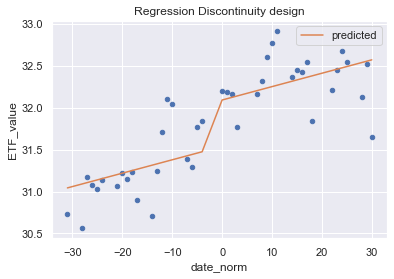

In [76]:
# demonstrate visually estimated RD design
base_plot = rd_df.plot.scatter(x="date_norm", y="ETF_value", color="C0")
rd_df.assign(predicted=rd_model.fittedvalues).plot(x="date_norm", y="predicted", ax=base_plot, color="C1")
plt.title("Regression Discontinuity design");

Similarly, from the graph we can visually see that there indeed is a significant jump around the cut-off date. Thus, the vaccination campaign had a positive impact on national ETF value.

# Discussion and conclusion (0.5 points)

To understand general vaccination trends with respect to national economic development we analyse three groups of countries formed based on different income levels. As expected, we observe visual confirmation that higher income countries have considerably larger vaccination rates. This difference has been growing since the invention of COVID vaccines. Interestingly, we also find that the higher the income level of a country, the more likely it started its national vaccination campaign earlier. With respect to the average vaccination rates across different income level groups we find that low-income countries reach only around 12%, middle income countries 39%, and high-income countries 64%, as reported on 2022-01-08. Thus, we do observe that vaccination rates differ accross countries defined by their income level. On the other hand, a box plot indicates that there is significant variation within each income group with regards to vaccination rates, thus income level alone could not predict the vaccination rate of a country. For future research one could investigate this relationship deeper, as we only tried to get a general overview mostly involving visualization tools but not advanced statistical methods. 

The analysis of the relationship between different countries’ ETF price and their vaccination rate revealed that there was a mix of positive, negative, and close to zero relationships in the chosen sample. The sample has countries from each continent to be more representative of all countries, either developed or developing. The countries were also selected because they have an ETF with available data managed by BlackRock Inc. Originally the sample included ETFs for Taiwan, Russia, Hong Kong, and Korea but the vaccination dataset did not contain enough data on those countries. From the Figures 1 to 3, the most obvious positive relationship was the American ETF possibly because it tracks the S&P 500, a popular index relative to the other countries’ ETFs. This was confirmed after calculating the covariance and correlation which for the USA was 1.33 and 0.90 respectively. The average covariance and correlation for the sample are 0.14 and 0.08 respectively. Therefore, we conclude that there is not a general positive relationship between vaccination rates and each country’s ETF price. Some of the countries in the sample display a positive relation and some do not. Possibly the reason for this is that many factors affect these different ETFs not only the value of the companies represented in the index they track. To estimate a more causal relationship between vaccination and ETF value, we employ a regression discontinuity design. It narrows down the analysed period to small subset of data points before and after the cut-off date. For this we choose the starting date of national vaccination campaigns in Australia and Germany. We use visual plots and the ordinary least square model to explain these relationships. We fail to reject the null hypothesis of no effect for Australian case, but we do find statistical evidence that the start of vaccination date does lead to rises in German ETF value by 0.55 USD after the cut-off date. We assume here that markets react to the actual first day of vaccination rather than the announcement of such intentions. Thus, for further research we recommend relaxing this assumption and test how markets react to the dates when national vaccination programs were announced to start as well as analysing other country cases.  

A strictly positive relationship is found when now comparing vaccination rates to GDP per capita for countries in the Eurostat database. Norway has the most obvious positive relationship viewed on Figure 6. This sample cannot generally be compared to the ETF sample because the countries are not the same. Finding reliable GDP data for some of the ETF countries is the reason why the same sample is not used in both analyses. The only common countries are Germany, Spain, Italy, and Switzerland. Italy and Switzerland both have a significant positive correlation coefficient for both analyses. On the other hand, Germany has a significant positive correlation only for vaccinations to GDP per capita. Spain has a negative correlation for vaccinations to ETF price in comparison to a significant positive correlation for vaccinations to GDP. Many factors may explain this discrepancy such as investors’ expectations for the market in Germany and Spain. This strictly positive relationship for all the Eurostat countries is potentially too good to be true. Unfortunately, one of the limitations of using GDP data is that it’s only recorded every quarter. This results in only 3 overlapping data points from the start of vaccinations at the beginning of 2021 for GDP per capita. This may be the reason why the average correlation of the sample is quite large at 0.86. This is the average after removing the 4 countries which had a correlation of 1.0, resulting from even fewer common values for the vaccination period. We cannot draw any firm conclusions from the correlation analysis of vaccination rate to GDP because of the lack of data points. Tentatively we can conclude that it appears GDP per capita is on a slight upward trend for the Eurostat countries as their vaccination rate increases. 

To answer our original question, vaccination rates do appear to vary between low-, middle-, and high-income countries. High-income countries started vaccinations earlier and have a significantly higher rate than middle- and low-income countries. This discrepancy widens during 2021 and low- and middle- income countries have not caught up yet. We conclude that there appears to be some relationship between vaccination rates and the indicators of economic activity used across countries. This can be used as a first step for future research that aims to find a causal relationship if one exists. For this, a model which controls for possible confounders would need to be designed. Using indicators with more data points and a larger sample of countries would also be required to be confident in a potential causal relationship.

This paragraph mentions limitations and weaknesses of this research. There may be lag in the responsiveness of GDP to any potential factors that influence it such as vaccination rates. GDP is only recorded every quarter resulting in only 3 data points for the vaccination period covering 2021. Comparisons between ETF and GDP affects cannot be made because different countries were used in the samples. Vaccination data on some of the chosen ETF countries is missing from the OWID (Our World in Data) dataset. ETFs which track an index are not representative of all businesses within an economy only larger corporations which are publicly traded. Stock markets react to news announcements; therefore, we may expect the market to react to the announcement of COVID-19 vaccines not the date of the first vaccination. Due to space and time constraints only two countries were analyzed with a regression discontinuity design. Separate plots were used for the visual comparison of vaccinations to ETF prices and GDP per capita to avoid overcrowding, which limits the overall visual comparison. For further research it would be ideal to include more data points for the GDP analysis and more countries for a broader overall analysis. Using the same countries for different economic indicators would be another improvement for future research. Other indicators of economic activity such as sector specific measures of output may be used to analyze vaccination relationships with different sectors.